# Chapter 4 Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano.tensor as tt

from scipy import stats
from scipy.special import expit as logistic

np.random.seed(123)

Bad val "cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])" on line #240
	"axes.prop_cycle    : cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])  # color cycle for plot lines
"
	in file "C:\Users\zhaolei\.matplotlib\matplotlibrc"
	Key axes.prop_cycle: 'cycler('color', [348ABD, A60628, 7A68A6, 467821,D55E00,  CC79A7, 56B4E9, 009E73, F0E442, 0072B2])' is not a valid cycler construction: invalid syntax (<string>, line 1)


## Exercise 1
***

*Re-run the first model using the petal length and then petal width variables. What are the main differences in the results? How wide or narrow is the 95% HPD interval in each case?*

In [3]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes

varnames = ['Œ±', 'Œ≤', 'bd']

In [3]:
for feature in ["sepal_length", "petal_width", "petal_length"]:

    x_n = feature
    x_0 = df[x_n].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        Œ± = pm.Normal('Œ±', mu=0, sd=10)
        Œ≤ = pm.Normal('Œ≤', mu=0, sd=10)

        Œº = Œ± + pm.math.dot(x_c, Œ≤)    
        Œ∏ = pm.Deterministic('Œ∏', pm.math.sigmoid(Œº))
        bd = pm.Deterministic('bd', -Œ±/Œ≤)

        yl = pm.Bernoulli('yl', p=Œ∏, observed=y_0)

        trace_0 = pm.sample(1000,cores=1,target_accept=0.9)
        
        print("Feature {} summary".format(feature))
        print(az.summary(trace_0, varnames, credible_interval=.95))

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:01<00:00, 930.08it/s]


Feature sepal_length summary
     mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±   0.302  0.346    -0.356      0.973      0.010    0.007    1322.0  1115.0   
Œ≤   5.375  1.067     3.562      7.687      0.034    0.024    1008.0   968.0   
bd -0.055  0.064    -0.188      0.058      0.002    0.001    1511.0  1295.0   

    ess_bulk  ess_tail  r_hat  
Œ±     1325.0    1214.0    1.0  
Œ≤     1038.0    1115.0    1.0  
bd    1527.0    1142.0    1.0  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:02<00:00, 610.84it/s]


Feature petal_width summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±    0.599  1.770    -2.764      4.130      0.068    0.051     671.0   610.0   
Œ≤   18.011  5.211     9.195     28.690      0.205    0.154     645.0   575.0   
bd  -0.036  0.092    -0.204      0.136      0.003    0.002     814.0   814.0   

    ess_bulk  ess_tail  r_hat  
Œ±      681.0     600.0   1.01  
Œ≤      693.0     958.0   1.00  
bd     800.0     825.0   1.01  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 3 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:03<00:00, 481.50it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±    3.497  4.083    -3.213     12.032      0.210    0.164     379.0   310.0   
Œ≤   12.815  5.217     3.618     22.493      0.265    0.188     387.0   386.0   
bd  -0.273  0.278    -0.822      0.187      0.012    0.009     506.0   488.0   

    ess_bulk  ess_tail  r_hat  
Œ±      444.0     443.0   1.01  
Œ≤      400.0     549.0   1.00  
bd     509.0     769.0   1.01  


From the results, we can see that the `bd` variable's HPD is the smallest with sepal length, and increases with petal_width and petal_length.

## Exercise 2
***

*Repeat exercise 1, this time using a Student's t-distribution as a weakly informative prior. Try different values of $\nu$.*

In [4]:
for nu in [1, 10, 30]:

    x_0 = df["petal_length"].values
    x_c = x_0 - x_0.mean()

    with pm.Model() as model_0:
        # Priors have been changed
        Œ± = pm.StudentT('Œ±', nu=nu, mu=0, sd=10)
        Œ≤ = pm.StudentT('Œ≤', nu=nu, mu=0, sd=10)


        Œº = Œ± + pm.math.dot(x_c, Œ≤)    
        Œ∏ = pm.Deterministic('Œ∏', pm.math.sigmoid(Œº))
        bd = pm.Deterministic('bd', -Œ±/Œ≤)

        yl = pm.Bernoulli('yl', p=Œ∏, observed=y_0)

        trace_0 = pm.sample(1000,cores=1,target_accept=0.9)
        
        print(f"Feature {feature} nu {nu} summary")
        print(az.summary(trace_0, varnames, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 119 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:08<00:00, 171.03it/s]
The acceptance probability does not match the target. It is 0.9954143069152399, but should be close to 0.9. Try to increase the number of tuning steps.
There were 119 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


Feature petal_length nu 1 summary
      mean       sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  \
Œ±    3.016   10.614   -15.391     27.339      0.725    0.513     214.0   
Œ≤   89.952  187.969     3.117    420.943     22.481   15.963      70.0   
bd  -0.146    0.240    -0.675      0.199      0.018    0.013     184.0   

    ess_sd  ess_bulk  ess_tail  r_hat  
Œ±    214.0     217.0     148.0   1.02  
Œ≤     70.0      60.0     100.0   1.03  
bd   184.0     215.0     460.0   1.01  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 1 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:02<00:00, 562.97it/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 10 summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±    4.192  4.596    -3.329     14.122      0.239    0.173     369.0   356.0   
Œ≤   14.580  7.038     4.192     29.220      0.380    0.269     343.0   343.0   
bd  -0.300  0.292    -0.857      0.177      0.014    0.011     425.0   371.0   

    ess_bulk  ess_tail  r_hat  
Œ±      411.0     510.0   1.01  
Œ≤      331.0     524.0   1.01  
bd     445.0     645.0   1.00  


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 1 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:02<00:00, 546.92it/s]
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Feature petal_length nu 30 summary
      mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±    3.696  4.214    -3.565     11.803      0.214    0.152     388.0   385.0   
Œ≤   14.291  6.455     3.907     26.839      0.332    0.239     378.0   364.0   
bd  -0.275  0.281    -0.812      0.197      0.013    0.009     446.0   446.0   

    ess_bulk  ess_tail  r_hat  
Œ±      411.0     533.0   1.01  
Œ≤      420.0     391.0   1.01  
bd     479.0     958.0   1.01  


Ê≠£Â¶ÇÊàë‰ª¨Âú®Á¨¨2Á´†ÔºàÊ¶ÇÁéáÁºñÁ®ãÔºâÂíåÁ¨¨3Á´†Ôºà‰ΩøÁî®Á∫øÊÄßÂõûÂΩíÂª∫Ê®°Ôºâ‰∏≠ÊâÄÁúãÂà∞ÁöÑÔºå‰ΩøÁî®StudentÁöÑtÂàÜÂ∏ÉÊØî‰ΩøÁî®È´òÊñØÂàÜÂ∏ÉËÉΩ‰∫ßÁîüÊõ¥ÂÅ•Â£ÆÁöÑÊ®°Âûã„ÄÇ

## Exercise 3
***

*Go back to the first example, the logistic regression for classifying setosa or versicolor given sepal length. Try to solve the same problem using a simple linear regression model, as we saw in chapter 3. How useful is linear regression compared to logistic regression? Can the result be interpreted as a probability?*

*Tip: check whether the values of $y$ are restricted to the interval [0,1].*

In [5]:
x_n = "sepal_length"
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_0:
    Œ± = pm.Normal('Œ±', mu=0, sd=10)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=10)
    sd = pm.HalfNormal("sd", sd=1)

    Œº = Œ± + pm.math.dot(x_c, Œ≤)

    yl = pm.Normal('yl', mu=Œº, sd=sd, observed=y_0)
    
    trace_linear = pm.sample(1000,cores=1)
    
    posterior_predictive_linear = pm.sample_posterior_predictive(trace_linear)
    print(az.summary(trace_linear, credible_interval=.95))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, Œ≤, Œ±]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:03<00:00, 502.98it/s]


     mean     sd  hpd_2.5%  hpd_97.5%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±   0.500  0.036     0.428      0.565      0.001    0.000    2847.0  2839.0   
Œ≤   0.572  0.054     0.465      0.679      0.001    0.001    2639.0  2475.0   
sd  0.350  0.025     0.302      0.399      0.000    0.000    2683.0  2653.0   

    ess_bulk  ess_tail  r_hat  
Œ±     2839.0    1604.0    1.0  
Œ≤     2683.0    1186.0    1.0  
sd    2688.0    1674.0    1.0  


C:\Users\zhaolei\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


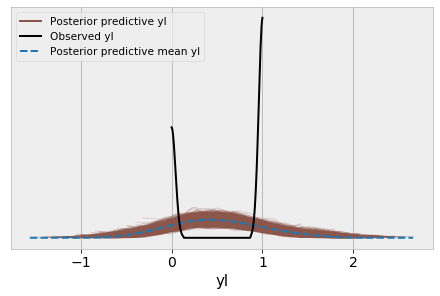

In [6]:
data = az.from_pymc3(trace=trace_linear, posterior_predictive=posterior_predictive_linear)
az.plot_ppc(data);

From the posterior predictive checks, this model is not very useful. We are trying to estimate the probability of a species given sepal_length, but a number of the posterior predictive check values are below 0 and above 1. As such, the result cannot be interpreted as a probability.

## Exercise 4
***

*In the example from the "Interpreting the coefficients of a logistic regression" section, we changed `sepal_length` by 1 unit. Using figure 4.6, corroborate that the value of `log_odds_versicolor_i` corresponds to the value of `probability_versicolor_i`. Do the same for `log_odds_versicolor_f` and `probability_versicolor_f`. Just by noting that `log_odds_versicolor_f` - `log_odds_versicolor_i` is negative, what can you say about the probability? Use figure 4.6 to help you. Is this result clear to you from the definition of log-odds?*

In [4]:
df = iris.query("species == ('setosa', 'versicolor')") 
y_1 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_1 = df[x_n].values

In [9]:
y_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [5]:
with pm.Model() as model_1: 
    Œ± = pm.Normal('Œ±', mu=0, sd=10) 
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=2, shape=len(x_n)) 
     
    Œº = Œ± + pm.math.dot(x_1, Œ≤) 
    Œ∏ = pm.Deterministic('Œ∏', 1 / (1 + pm.math.exp(-Œº))) 
    bd = pm.Deterministic('bd', -Œ±/Œ≤[1] - Œ≤[0]/Œ≤[1] * x_1[:,0])
     
    yl = pm.Bernoulli('yl', p=Œ∏, observed=y_1) 
 
    trace_1 = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:23<00:00, 106.69it/s]


In [6]:
varnames = ['Œ±', 'Œ≤'] 
summary = az.summary(trace_1, var_names=varnames)
summary

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±    -9.006  4.777 -17.470    0.199      0.139    0.100    1173.0  1140.0   
Œ≤[0]  4.676  0.906   2.890    6.252      0.026    0.019    1175.0  1119.0   
Œ≤[1] -5.241  0.987  -7.224   -3.461      0.025    0.018    1580.0  1479.0   

      ess_bulk  ess_tail  r_hat  
Œ±       1174.0    1219.0    1.0  
Œ≤[0]    1198.0    1311.0    1.0  
Œ≤[1]    1638.0    1338.0    1.0

In [11]:
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

log_odds_versicolor_i = (summary['mean'] * [1, x_1, x_2]).sum()
probability_versicolor_i = logistic(log_odds_versicolor_i)   #from scipy.special import expit as logistic

log_odds_versicolor_f = (summary['mean'] * [1, x_1, x_2+1]).sum()
probability_versicolor_f = logistic(log_odds_versicolor_f)

print (probability_versicolor_f , probability_versicolor_i)
log_odds_versicolor_f - log_odds_versicolor_i, probability_versicolor_f - probability_versicolor_i

0.00013260541894241683 0.024435006188741414


(-5.241, -0.024302400769798997)

The value of -5.22 is consistent with the summary and our "hand check". A log odds value of -5.22 means that as $x_2$ increases by one unit, the probability that the species is versicolor decreases. Or, equivalently, as sepal width increases, the probability that the flower is versicolor decreases.

We can verify this with a quick plot:

In [10]:
colors

0      blue
1      blue
2      blue
3      blue
4      blue
      ...  
95    green
96    green
97    green
98    green
99    green
Name: species, Length: 100, dtype: object

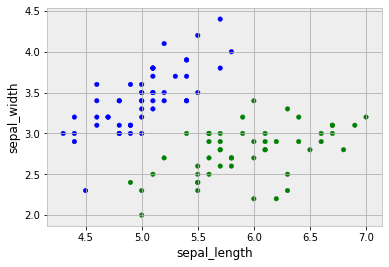

In [8]:
colors = df["species"].replace({'setosa':"blue", 'versicolor':"green"})
df.plot(kind="scatter", x="sepal_length", y="sepal_width", c=colors);

We see that, as sepal width increases from 3 to 4, we get further away from the green dots, reducing the probability that the flower we're seeing is of the versicolor species. Ê¶ÇÁéá‰ªé2.4%ÊéâÂà∞0.01%

## Question 5
***

*Use the same example from the previous exercise. For `model_1`, check how much the log-odds change when increasing `sepal_length` from 5.5 to 6.5 (spoiler: it should be 4.66). How much does the probability change? How does this increase compared to when we increase `sepal_length` from 4.5 to 5.5?*

In [36]:
# Values for sepal length are directly added in the log_odds_line
x_1 = 4.5  # sepal_length
x_2 = 3   # sepal_width 

for i in (0,1):
    log_odds_versicolor_i = (summary['mean'] * [1, x_1 + i, x_2]).sum()
    probability_versicolor_i = logistic(log_odds_versicolor_i)


    log_odds_versicolor_f = (summary['mean'] * [1, x_1 + i + 1, x_2]).sum()
    probability_versicolor_f = logistic(log_odds_versicolor_f)

    print(f"""sepal_length_i {x_1 + i}, sepal_length_f {x_1 + i + 1}
    Log Odds Change {log_odds_versicolor_f - log_odds_versicolor_i}
    Probability Change {probability_versicolor_f - probability_versicolor_i}
    """)

sepal_length_i 4.5, sepal_length_f 5.5
    Log Odds Change 4.709999999999999
    Probability Change 0.7080309252764029
    
sepal_length_i 5.5, sepal_length_f 6.5
    Log Odds Change 4.710000000000001
    Probability Change 0.26467417655124303
    


From the calculation above we see that while the log-odds change stays constant, as it should in linear regression, the probability change is not as large from 5.5 to 6.5 as it is from 4.5 to 5.5. Looking at the graphic this intuitively makes sense as well. When sepal length is at 4.5, the chance that the species is versicolor is very small. When sepal length jumps to 5.5, this probability gets a lot bigger. This means that subsequently going from 5.5 to 6.5 still increases the probability of versicolor, but not as much - because, well, at 5.5 there is already a good chance that the species we're seeing is versicolor.

## Exercise 6
***

*In the example for dealing with unbalanced data, change `df = df[45:]` to `df = df[22:78]`. This will keep roughly the same number of data points, but now the classes will be balanced. Compare the new result with the previous ones. Which one is more similar to the example using the complete dataset?*  
Âú®Â§ÑÁêÜ‰∏çÂπ≥Ë°°Êï∞ÊçÆÁöÑÁ§∫‰æã‰∏≠ÔºåÂ∞Üdf = df [45Ôºö]Êõ¥Êîπ‰∏∫df = df [22:78]„ÄÇ ËøôÂ∞Ü‰øùÊåÅÂ§ßËá¥Áõ∏ÂêåÊï∞ÈáèÁöÑÊï∞ÊçÆÁÇπÔºå‰ΩÜÊòØÁé∞Âú®Ëøô‰∫õÁ±ªÂ∞ÜËææÂà∞Âπ≥Ë°°„ÄÇ Â∞ÜÊñ∞ÁªìÊûú‰∏é‰ª•ÂâçÁöÑÁªìÊûúËøõË°åÊØîËæÉ„ÄÇ Âì™‰∏Ä‰∏™‰∏é‰ΩøÁî®ÂÆåÊï¥Êï∞ÊçÆÈõÜÁöÑÁ§∫‰æãÊõ¥Áõ∏‰ººÔºü

In [12]:
iris = pd.read_csv('../code/data/iris.csv')

df = iris.query("species == ('setosa', 'versicolor')") 
df = df[22:78]

y_3 = pd.Categorical(df['species']).codes 
x_n = ['sepal_length', 'sepal_width'] 
x_3 = df[x_n].values

varnames = ['Œ±', 'Œ≤'] 

In [13]:
with pm.Model() as model_3: 
    Œ± = pm.Normal('Œ±', mu=0, sd=10) 
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=2, shape=len(x_n)) 
     
    Œº = Œ± + pm.math.dot(x_3, Œ≤) 
    Œ∏ = 1 / (1 + pm.math.exp(-Œº)) 
    bd = pm.Deterministic('bd', -Œ±/Œ≤[1] - Œ≤[0]/Œ≤[1] * x_3[:,0]) 
     
    yl = pm.Bernoulli('yl', p=Œ∏, observed=y_3) 
 
    trace_3 = pm.sample(1000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:10<00:00, 142.49it/s]


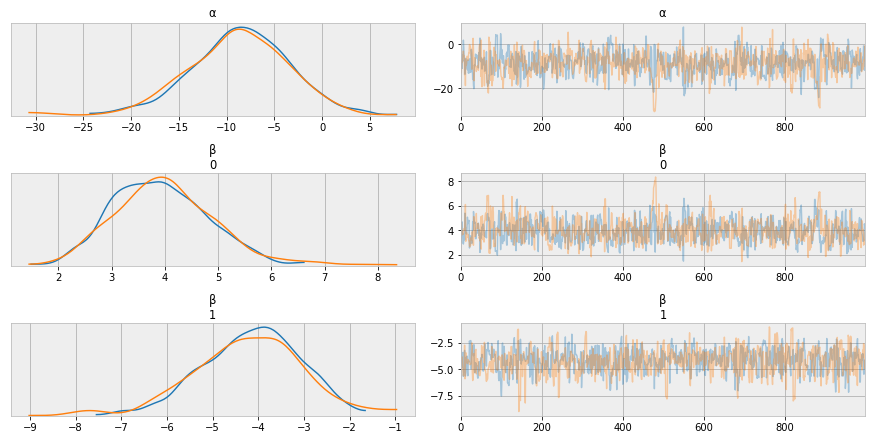

In [14]:
az.plot_trace(trace_3, varnames);

In [18]:
print(trace_3['bd'].shape,x_3[:,0].shape)

(2000, 56) (56,)


In [55]:
x_3[:,0]

array([4.6, 5.1, 4.8, 5. , 5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9,
       5. , 5.5, 4.9, 4.4, 5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6,
       5.3, 5. , 7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. ,
       5.9, 6. , 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1,
       6.4, 6.6, 6.8, 6.7])

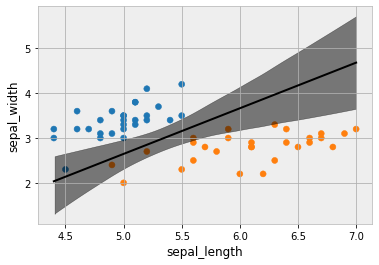

In [15]:
idx = np.argsort(x_3[:,0]) 
bd = trace_3['bd'].mean(0)[idx]

plt.scatter(x_3[:,0], x_3[:,1], c= [f'C{x}' for x in y_3]) 
plt.plot(x_3[:,0][idx], bd, color='k')

az.plot_hpd(x_3[:,0],trace_3['bd'], color='k')

plt.xlabel(x_n[0]) 
plt.ylabel(x_n[1]);

The decision boundary in this plot looks more like the unfiltered dataset as the blue data points are largely not contained in the boundary decision's 95% HPD. This indicates that the balanced model, even with less data points, is better able to distinguish between classes.Ê≠§Âõæ‰∏≠ÁöÑÂÜ≥Á≠ñËæπÁïåÁúãËµ∑Êù•Êõ¥ÂÉèÊòØÊú™ËøáÊª§ÁöÑÊï∞ÊçÆÈõÜÔºåÂõ†‰∏∫ËìùËâ≤Êï∞ÊçÆÁÇπÂú®ËæπÁïåÂÜ≥Á≠ñÁöÑ95ÔºÖHPD‰∏≠Âü∫Êú¨‰∏çÂåÖÂê´„ÄÇ ËøôË°®ÊòéÂç≥‰ΩøÊï∞ÊçÆÁÇπËæÉÂ∞ëÔºåÂπ≥Ë°°Ê®°Âûã‰πüËÉΩÂ§üÊõ¥Â•ΩÂú∞Âå∫ÂàÜÁ±ªÂà´„ÄÇ

## Exercise 7
***

*Suppose instead of a softmax regression we use a simple linear model by coding `setosa = 0`, `versicolor = 1` and `virginica = 2`. Under the simple linear regression model, what will happen if we switch the coding? Will we get the same or different results?*

Lets run the model to have data points for a discussion:

In [60]:
#iris = sns.load_dataset('iris')
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-1]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0)) / x_s.std(axis=0)

with pm.Model() as model_s:
    Œ± = pm.Normal('Œ±', mu=0, sd=5, shape=3)
    Œ≤ = pm.Normal('Œ≤', mu=0, sd=5, shape=(4, 3))
    Œº = pm.Deterministic('Œº', Œ± + pm.math.dot(x_s, Œ≤))
    
    Œ∏ = tt.nnet.softmax(Œº)
    yl = pm.Categorical('yl', p=Œ∏, observed=y_s)
    
    trace_s = pm.sample(2000,cores=1)

C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zhaolei\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimension

In [61]:
print(trace_s['Œº'].shape)
print(trace_s['Œº'][:,0,0].mean())

(4000, 150, 3)
20.714290638926418


In [62]:
data_pred = trace_s['Œº'].mean(0)
data_pred[:5]

array([[ 20.71429064,   6.51266485, -26.92381046],
       [ 17.62574514,   7.08823961, -24.38867616],
       [ 20.10498986,   6.29113277, -26.03041577],
       [ 18.96786696,   6.1043822 , -24.68783378],
       [ 21.77644085,   6.07337778, -27.52563463]])

#### Conceptual Understanding
Note the shape of the trace. The dimensions should read as follows: we have 4000 estimations of the 3 softmax class values for each of the 150 rows in the dataset.Ê≥®ÊÑèËøπÁ∫øÁöÑÂΩ¢Áä∂„ÄÇ Áª¥Â∫¶Â∫îÂ¶Ç‰∏ãÊâÄÁ§∫ÔºöÂØπ‰∫éÊï∞ÊçÆÈõÜ‰∏≠ÁöÑ150Ë°åÔºåÊàë‰ª¨Êúâ3‰∏™softmaxÁ±ªÂÄºÁöÑ4000‰∏™‰º∞ËÆ°„ÄÇ

#### Discussion
If we changed the softmax model to a linear regression model a couple things would change. First, the interpretation of the final output would be different. A softmax prediction estimates the probability of each class, whereas a linear regression would just provide one number as an estimate for the class. The other problem is that a linear regression would output continous values across all real numbers, and how to define when one class starts and another ends is unclear.Â¶ÇÊûúÊàë‰ª¨Â∞ÜsoftmaxÊ®°ÂûãÊõ¥Êîπ‰∏∫Á∫øÊÄßÂõûÂΩíÊ®°ÂûãÔºåÂàô‰ºöÂèëÁîüÂá†‰ª∂‰∫ã„ÄÇ È¶ñÂÖàÔºåÊúÄÁªàËæìÂá∫ÁöÑËß£Èáä‰ºöÊúâÊâÄ‰∏çÂêå„ÄÇ softmaxÈ¢ÑÊµã‰º∞ËÆ°ÊØè‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéáÔºåËÄåÁ∫øÊÄßÂõûÂΩíÂ∞Ü‰ªÖÊèê‰æõ‰∏Ä‰∏™Êï∞Â≠ó‰Ωú‰∏∫ËØ•Á±ªÂà´ÁöÑ‰º∞ËÆ°„ÄÇ Âè¶‰∏Ä‰∏™ÈóÆÈ¢òÊòØÁ∫øÊÄßÂõûÂΩí‰ºöÂú®ÊâÄÊúâÂÆûÊï∞‰∏äËæìÂá∫ËøûÁª≠ÂÄºÔºåÂπ∂‰∏î‰∏çÊ∏ÖÊ•öÂ¶Ç‰ΩïÂÆö‰πâ‰∏Ä‰∏™Á±ª‰ΩïÊó∂ÂºÄÂßãËÄåÂè¶‰∏ÄÁ±ª‰ΩïÊó∂ÁªìÊùü„ÄÇ

## Exercise 8
***

*Compare the likelihood of the logistic model versus the likelihood of the LDA model. Use the `sample_posterior_predictive` function to generate predicted data and compare the types of data you get for both cases. Be sure you understand the difference between the types of data the model predicts.*

In [63]:
iris = pd.read_csv('../code/data/iris.csv')
df = iris.query("species == ('setosa', 'versicolor')") 
y_3 = pd.Categorical(df['species']).codes 
x_n = 'sepal_length'
x_3 = df[x_n].values

Logistic Regression model (Discriminative)

In [64]:
with pm.Model() as logistic_model:
    Œ± = pm.Normal("Œ±", mu=0, sd=10)
    Œ≤ = pm.Normal("Œ≤", mu=0, sd=10)
    Œº =  Œ± + pm.math.dot(x_3, Œ≤)
    
    Œ∏ = pm.Deterministic("Œ∏", pm.math.sigmoid(Œº))
    bd = pm.Deterministic("bd", -Œ± / Œ≤ )
    
    y1= pm.Bernoulli("y1", p=Œ∏, observed=y_3)
    
    trace_logistic = pm.sample(2000,cores=1)
    ppc_logistic = pm.sample_posterior_predictive(trace_logistic)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:09<00:00, 259.95it/s]
The acceptance probability does not match the target. It is 0.9117918992769471, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.892092146794132, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4000/4000 [00:05<00:00, 749.24it/s]


Linear Discriminant Analysis (Discriminative)

In [65]:
with pm.Model() as lda_model:
    œÉ = pm.HalfNormal("œÉ", sd=10)
    Œº = pm.Normal("Œº", mu=0, sd=10, shape=2)
    
    setosa = pm.Normal('setosa', mu=Œº[0], sd=œÉ, observed=x_3[:50])
    versicolor = pm.Normal("versicolor", mu=Œº[1], sd=œÉ, observed=x_3[50:])
    bd = pm.Deterministic('bd', (Œº[0] + Œº[1]) / 2)
    
    trace_lda = pm.sample(1000,cores=1)
    ppc_lda = pm.sample_posterior_predictive(trace_lda)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œº, œÉ]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:01<00:00, 847.33it/s]
The acceptance probability does not match the target. It is 0.8835062197754676, but should be close to 0.8. Try to increase the number of tuning steps.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:04<00:00, 411.44it/s]


The likelihood of the logisitic regression model is as follows

$$ y \text{~} Bernoulli(\theta) $$

and the likelihood of the Linear Discriminative Analysis are

\begin{eqnarray}
Versicolor_{sepal\_length} \text{~} Normal(\mu_0, \sigma) \newline
Setosa_{sepal\_length} \text{~} Normal(\mu_1, \sigma)
\end{eqnarray}

In the logistic regression we are not estimating the properties of the sepal length. We are merely fitting parameters of the inverse link function. In the LDA model we are estimating the sepal length distributions directly.

In [72]:
ppc_logistic["y1"][0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [70]:
y_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [74]:
ppc_lda["setosa"][0]

array([4.4297893 , 5.64246678, 4.77889197, 5.30181165, 5.1420539 ,
       5.10744326, 5.11823763, 4.99065198, 5.66995743, 4.73448354,
       5.84483773, 5.0375595 , 5.54325633, 5.32343878, 4.81644208,
       5.46516705, 4.62688578, 4.6054698 , 4.09925428, 4.93220357,
       5.37722965, 4.89600715, 5.75311056, 5.12780735, 4.93886506,
       4.54426986, 4.65191177, 5.26184933, 4.63656699, 5.75405569,
       5.05104983, 5.24892776, 5.05655069, 5.21108877, 5.22469945,
       5.48457826, 5.16406603, 4.89805947, 4.80755936, 5.31398904,
       5.62331936, 5.1903452 , 4.96401973, 4.79965042, 4.64752244,
       4.97195608, 5.11734843, 5.0168921 , 4.41418109, 4.93889411])

When comparing the posterior predictive, it can be seen that the logistic model is binary, estimating either 0 or 1, while the LDA model has real numbers that generally look like sepal lengths. This follows our understandings of the models: the logistic regression makes predictions as to which class a particular sepal length belongs to, whereas the LDA model makes predictions about the sepal lengths directly.ÊØîËæÉÂêéÈ™åÈ¢ÑÊµãÊó∂ÔºåÂèØ‰ª•ÁúãÂá∫ÈÄªËæëÊ®°ÂûãÊòØ‰∫åÂÖÉÊ®°ÂûãÔºå‰º∞ËÆ°‰∏∫0Êàñ1ÔºåËÄåLDAÊ®°ÂûãÂÖ∑ÊúâÈÄöÂ∏∏ÁúãËµ∑Êù•ÂÉèËêºÁâáÈïøÂ∫¶ÁöÑÂÆûÊï∞„ÄÇ ËøôÈÅµÂæ™‰∫ÜÊàë‰ª¨ÂØπÊ®°ÂûãÁöÑÁêÜËß£ÔºöÈÄªËæëÂõûÂΩíÂØπÁâπÂÆöÁöÑËêºÁâáÈïøÂ∫¶Â±û‰∫éÂì™‰∏™Á±ªÂà´ËøõË°åÈ¢ÑÊµãÔºåËÄåLDAÊ®°ÂûãÁõ¥Êé•ÂØπËêºÁâáÈïøÂ∫¶ËøõË°åÈ¢ÑÊµã„ÄÇ

## Exercise 9
***

*Using the fish data, extend the `ZIP_reg` model to include the persons variable as part of a linear model. Include this variable to model the number of extra zeros. You should get a model that includes two linear models: one connecting the number of children and the presence/absence of a camper to the Poisson rate (as in the example we saw), and another connecting the number of persons to the $\psi$ variable. For the second case, you will need a logistic inverse link!*

‰ΩøÁî®È±ºÁ±ªÊï∞ÊçÆÔºåÊâ©Â±ïZIP_regÊ®°ÂûãÔºå‰ΩøÂÖ∂ÂåÖÂê´‰∫∫ÂëòÂèòÈáè‰Ωú‰∏∫Á∫øÊÄßÊ®°ÂûãÁöÑ‰∏ÄÈÉ®ÂàÜ„ÄÇ ÂåÖÊã¨Ê≠§ÂèòÈáè‰ª•Âª∫Ê®°È¢ùÂ§ñÈõ∂ÁöÑÊï∞Èáè„ÄÇ ÊÇ®Â∫îËØ•ÂæóÂà∞‰∏Ä‰∏™ÂåÖÂê´‰∏§‰∏™Á∫øÊÄßÊ®°ÂûãÁöÑÊ®°ÂûãÔºö‰∏Ä‰∏™Â∞ÜÂ≠©Â≠êÁöÑÊï∞ÈáèÂíåÈú≤Ëê•ËÄÖÁöÑÂ≠òÂú®‰∏éÂê¶‰∏éÊ≥äÊùæÁéáËÅîÁ≥ªËµ∑Êù•ÔºàÂ¶ÇÊàë‰ª¨ÊâÄÁúãÂà∞ÁöÑÁ§∫‰æãÔºâÔºåÂè¶‰∏Ä‰∏™Â∞Ü‰∫∫Êï∞‰∏éùúìÂèòÈáèËÅîÁ≥ªËµ∑Êù•„ÄÇ ÂØπ‰∫éÁ¨¨‰∫åÁßçÊÉÖÂÜµÔºåÊÇ®Â∞ÜÈúÄË¶ÅÈÄªËæëÈÄÜÂêëÈìæÊé•ÔºÅ

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤_person, Œ±_person, Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1500/1500 [00:06<00:00, 216.72it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argum

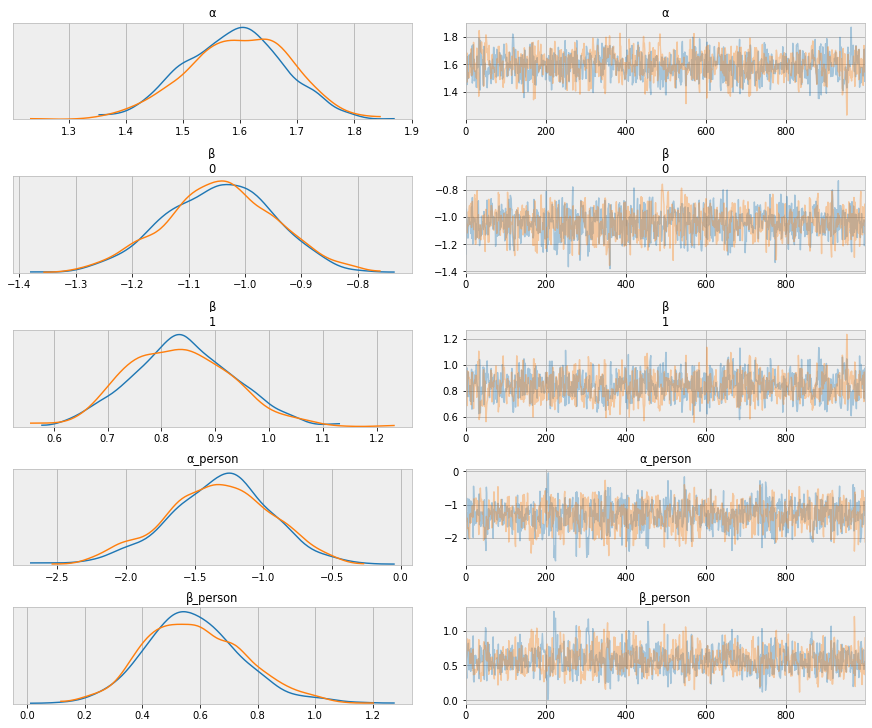

In [73]:
fish_data = pd.read_csv('../code/data/fish.csv')

with pm.Model() as ZIP_reg:
    # œà = pm.Beta('œà', 1, 1)
    Œ± = pm.Normal('Œ±', 0, 10)
    Œ≤ = pm.Normal('Œ≤', 0, 10, shape=2)
    
    Œ∏ = pm.math.exp(Œ± + Œ≤[0] * fish_data['child'] + Œ≤[1] * fish_data['camper'])
    
    Œ±_person = pm.Normal('Œ±_person', 0, 10)
    Œ≤_person = pm.Normal('Œ≤_person', 0, 10)
    œà = pm.math.sigmoid(Œ±_person + Œ≤_person * fish_data['persons'])
    
    yl = pm.ZeroInflatedPoisson('yl', œà, Œ∏, observed=fish_data['count'])
    
    trace_ZIP_reg = pm.sample(1000,cores=1)
    
az.plot_trace(trace_ZIP_reg);

In [75]:
az.summary(trace_ZIP_reg)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
Œ±         1.593  0.088   1.423    1.745      0.003    0.002     951.0   945.0   
Œ≤[0]     -1.046  0.097  -1.218   -0.856      0.003    0.002    1325.0  1324.0   
Œ≤[1]      0.837  0.095   0.658    1.009      0.003    0.002     962.0   962.0   
Œ±_person -1.328  0.386  -2.076   -0.623      0.013    0.010     868.0   792.0   
Œ≤_person  0.582  0.170   0.284    0.928      0.006    0.004     878.0   805.0   

          ess_bulk  ess_tail  r_hat  
Œ±            946.0    1057.0    1.0  
Œ≤[0]        1325.0    1083.0    1.0  
Œ≤[1]         954.0    1096.0    1.0  
Œ±_person     889.0     938.0    1.0  
Œ≤_person     907.0     886.0    1.0

## Exercise 10
***

*Use the data for the robust logistic example to feed a non-robust logistic regression model and to check that the outliers actually affected the results. You may want to add or remove outliers to better understand the effect of the estimation on a logistic regression and the robustness of the model introduced in this chapter.*Â∞ÜÊï∞ÊçÆÁî®‰∫éÁ®≥ÂÅ•ÁöÑÈÄªËæëÊ®°ÂûãÁ§∫‰æãÔºå‰ª•Êèê‰æõÈùûÁ®≥ÂÅ•ÁöÑÈÄªËæëÂõûÂΩíÊ®°ÂûãÂπ∂Ê£ÄÊü•ÂºÇÂ∏∏ÂÄºÊòØÂê¶ÂÆûÈôÖÂΩ±Âìç‰∫ÜÁªìÊûú„ÄÇ ÊÇ®ÂèØËÉΩÊÉ≥Ë¶ÅÊ∑ªÂä†ÊàñÂà†Èô§ÂºÇÂ∏∏ÂÄºÔºå‰ª•Êõ¥Â•ΩÂú∞‰∫ÜËß£‰º∞ËÆ°ÂØπÈÄªËæëÂõûÂΩíÁöÑÂΩ±Âìç‰ª•ÂèäÊú¨Á´†‰ªãÁªçÁöÑÊ®°ÂûãÁöÑÂÅ•Â£ÆÊÄß„ÄÇ

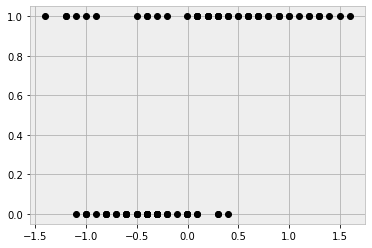

In [3]:
#iris = sns.load_dataset("iris") 
df = iris.query("species == ('setosa', 'versicolor')") 

y_0 = pd.Categorical(df['species']).codes 
x_n = 'sepal_length'  
x_0 = df[x_n].values 
y_0 = np.concatenate((y_0, np.ones(6, dtype=int))) 
x_0 = np.concatenate((x_0, [4.2, 4.5, 4.0, 4.3, 4.2, 4.4])) 
x_c = x_0 - x_0.mean() 

plt.plot(x_c, y_0, 'o', color='k');

Let's take the robust logistic regression from the chapter and make it non robust:

In [17]:
with pm.Model() as non_rlg:
    Œ± = pm.Normal("Œ±", mu=0, sd=10)
    Œ≤ = pm.Normal("Œ≤", mu=0, sd=10)
    Œº = Œ± + Œ≤ * x_c
    
    Œ∏ = pm.Deterministic("Œ∏", pm.math.sigmoid(Œº))
    bd = pm.Deterministic("bd", -Œ±/Œ≤)
    
    # Short Circuit Robust regression
    # œÄ = pm.Beta("œÄ", 1, 1)
    # p = œÄ *.5 + (1-œÄ)*Œ∏
    p = Œ∏
    
    y = pm.Bernoulli("y", p=p, observed=y_0)
    
    trace_rlg = pm.sample(10000,tune=5000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15000/15000 [00:15<00:00, 984.23it/s]


In [18]:
varnames = ['Œ±', 'Œ≤', 'bd']
az.summary(trace_rlg, varnames)

mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
Œ±   0.228  0.244  -0.213    0.700      0.002    0.002   14217.0  10544.0   
Œ≤   2.367  0.478   1.489    3.268      0.004    0.003   14699.0  14091.0   
bd -0.097  0.106  -0.302    0.097      0.001    0.001   14190.0  12442.0   

    ess_bulk  ess_tail  r_hat  
Œ±    14260.0   12219.0    1.0  
Œ≤    14926.0   13904.0    1.0  
bd   14163.0   13217.0    1.0

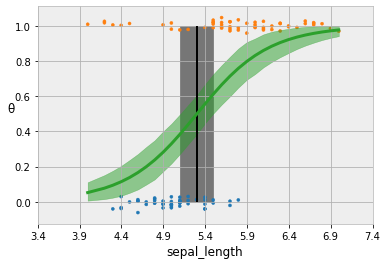

In [25]:
theta = trace_rlg['Œ∏'].mean(axis=0)
idx = np.argsort(x_c)

plt.vlines(trace_rlg['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_rlg['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)

plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
theta_hpd = az.hpd(trace_rlg['Œ∏'])[idx]
plt.fill_between(x_c[idx], theta_hpd[:,0], theta_hpd[:,1], color='C2', alpha=0.5)

plt.xlabel(x_n)
plt.ylabel('Œ∏', rotation=0)

# use original scale for xticks
locs, _ = plt.xticks() 
plt.xticks(locs, np.round(locs + x_0.mean(), 1))
plt.savefig('B11197_04_13.png', dpi=300);

Compare this plot to figure 4.13. Note that the HPD for the decision boundary is wider, reflecting the additional uncertainty. This is also reflected in the slope which is more gradual. This is reflected both in the plot, but also the beta parameter (15.77 for robust model versus 2.38 for the non-robust model).Â∞ÜÊ≠§Âõæ‰∏éÂõæ4.13ËøõË°åÊØîËæÉ„ÄÇ ËØ∑Ê≥®ÊÑèÔºåÂÜ≥Á≠ñËæπÁïåÁöÑHPDËæÉÂÆΩÔºåÂèçÊò†‰∫ÜÈ¢ùÂ§ñÁöÑ‰∏çÁ°ÆÂÆöÊÄß„ÄÇ Ëøô‰πüÂèçÊò†Âú®Êõ¥Âπ≥ÁºìÁöÑÂù°Â∫¶‰∏ä„ÄÇ ËøôÊó¢ÂèçÊò†Âú®Âõæ‰∏≠Ôºå‰πüÂèçÊò†Âú®betaÂèÇÊï∞‰∏≠ÔºàÁ®≥ÂÅ•Ê®°Âûã‰∏∫15.77ÔºåÈùûÁ®≥ÂÅ•Ê®°Âûã‰∏∫2.38Ôºâ„ÄÇ

In [26]:
theta[idx]

array([0.05199836, 0.0770595 , 0.0770595 , 0.09366271, 0.09366271,
       0.11362882, 0.11362882, 0.11362882, 0.11362882, 0.13748105,
       0.13748105, 0.16573455, 0.16573455, 0.16573455, 0.16573455,
       0.19884274, 0.19884274, 0.23712215, 0.23712215, 0.23712215,
       0.23712215, 0.23712215, 0.28065878, 0.28065878, 0.28065878,
       0.28065878, 0.28065878, 0.32920898, 0.32920898, 0.32920898,
       0.32920898, 0.32920898, 0.32920898, 0.32920898, 0.32920898,
       0.32920898, 0.32920898, 0.38211962, 0.38211962, 0.38211962,
       0.38211962, 0.38211962, 0.38211962, 0.38211962, 0.38211962,
       0.38211962, 0.43830174, 0.43830174, 0.43830174, 0.43830174,
       0.49628874, 0.55438698, 0.55438698, 0.55438698, 0.55438698,
       0.55438698, 0.55438698, 0.61088939, 0.61088939, 0.61088939,
       0.61088939, 0.61088939, 0.61088939, 0.61088939, 0.66429239,
       0.66429239, 0.66429239, 0.66429239, 0.66429239, 0.71345525,
       0.71345525, 0.71345525, 0.71345525, 0.71345525, 0.71345

In [11]:
# Quadratic Model
with pm.Model() as space_flu_model:
    Œ± = pm.Normal("Œ±", 0,1)
    Œ≤ = pm.Normal("Œ≤", 0,1, shape=2)
    
    # Quadratic Parmetarization is in this line
    Œº = Œ± + pm.math.dot(x_c, Œ≤[0]) + pm.math.dot(x_c**2, Œ≤[1])
    Œ∏ = pm.Deterministic("Œ∏", pm.math.sigmoid(Œº))
    
    # bd = pm.Deterministic('bd', -Œ±/Œ≤)
    
    y = pm.Bernoulli("y", p=Œ∏, observed=y_0 )
    flu_logistic_trace = pm.sample(10000,tune=5000,cores=1,init="adapt_diag")
    flu_logistic_samples  = pm.sample_posterior_predictive(flu_logistic_trace, vars=[Œ∏,y], samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Œ≤, Œ±]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15000/15000 [00:19<00:00, 751.28it/s]
C:\Users\zhaolei\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 643.20it/s]


Text(0, 0.5, 'Œ∏')

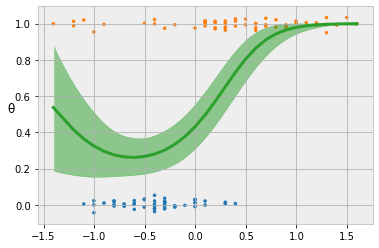

In [23]:
# Plot observed value
plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])

# Plot mean of parameter estimate
theta = flu_logistic_trace['Œ∏'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)

# Plot confidence of parameter estimate
az.plot_hpd(x_c, flu_logistic_trace['Œ∏'], color='C2')

plt.ylabel('Œ∏', rotation=0)

In [24]:
 theta[idx]

array([0.53642655, 0.41402669, 0.41402669, 0.36446816, 0.36446816,
       0.3249116 , 0.3249116 , 0.3249116 , 0.3249116 , 0.29548739,
       0.29548739, 0.27562209, 0.27562209, 0.27562209, 0.27562209,
       0.26455259, 0.26455259, 0.2616824 , 0.2616824 , 0.2616824 ,
       0.2616824 , 0.2616824 , 0.26676918, 0.26676918, 0.26676918,
       0.26676918, 0.26676918, 0.27999629, 0.27999629, 0.27999629,
       0.27999629, 0.27999629, 0.27999629, 0.27999629, 0.27999629,
       0.27999629, 0.27999629, 0.30196942, 0.30196942, 0.30196942,
       0.30196942, 0.30196942, 0.30196942, 0.30196942, 0.30196942,
       0.30196942, 0.33363851, 0.33363851, 0.33363851, 0.33363851,
       0.37609791, 0.43018253, 0.43018253, 0.43018253, 0.43018253,
       0.43018253, 0.43018253, 0.49579506, 0.49579506, 0.49579506,
       0.49579506, 0.49579506, 0.49579506, 0.49579506, 0.57105844,
       0.57105844, 0.57105844, 0.57105844, 0.57105844, 0.65172829,
       0.65172829, 0.65172829, 0.65172829, 0.65172829, 0.65172

In [20]:
az.compare({'model_l':trace_rlg,'model_p':flu_logistic_trace},
                    method='BB-pseudo-BMA') 

rank      loo    p_loo    d_loo      weight       se      dse warning  \
model_p    0 -47.1787  1.89377        0    0.992534  6.32925        0   False   
model_l    1 -56.7791  2.59414  9.60043  0.00746561  3.53691  4.33072   False   

        loo_scale  
model_p       log  
model_l       log

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DD5C000F0>,
      dtype=object)

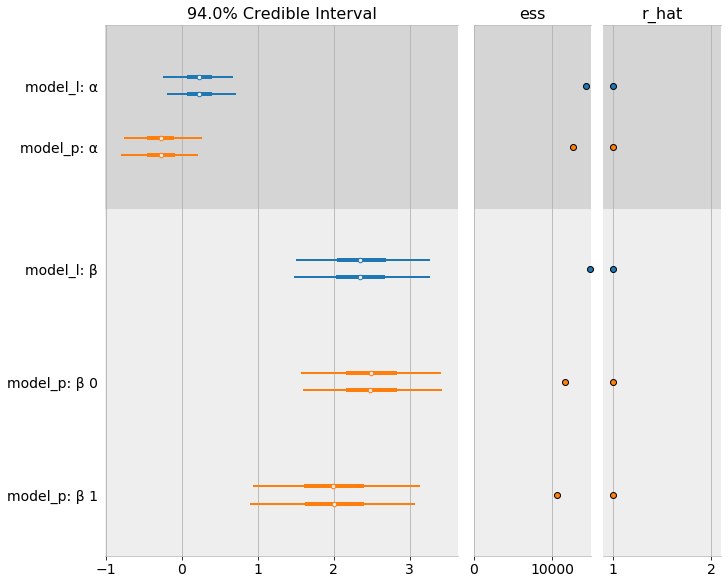

In [21]:
az.plot_forest([trace_rlg, flu_logistic_trace], model_names=['model_l', 'model_p'],
               var_names=['Œ±', 'Œ≤'], r_hat=True,ess=True)

## Exercise 11
***

*Read and run the following notebooks from PyMC3's documentation:*

- [GLM: Linear regression](https://docs.pymc.io/notebooks/GLM-linear.html)
- [GLM: Robust Linear Regression](https://docs.pymc.io/notebooks/GLM-robust.html)
- [GLM: Hierarchical Linear Regression](https://docs.pymc.io/notebooks/GLM-hierarchical.html)

### The Inference Button: Bayesian GLMs made easy with PyMC3
Y=XŒ≤+œµ  ÁÑ∂ÂêéÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî®ÊôÆÈÄöÊúÄÂ∞è‰∫å‰πòÊàñÊúÄÂ§ß‰ººÁÑ∂Êù•ÊâæÂà∞ÊúÄ‰Ω≥ÊãüÂêàŒ≤„ÄÇ

Probabilistic Reformulation¬∂
Bayesians take a probabilistic view of the world and express this model in terms of probability distributions. Our above linear regression can be rewritten to yield:Ë¥ùÂè∂ÊñØ‰∏ª‰πâËÄÖ‰ª•Ê¶ÇÁéáËÆ∫ÁöÑÁúºÂÖâÁúãÂæÖ‰∏ñÁïåÔºåÂπ∂Áî®Ê¶ÇÁéáÂàÜÂ∏ÉÊù•Ë°®ËææËøôÁßçÊ®°Âûã„ÄÇÊàë‰ª¨‰∏äÈù¢ÁöÑÁ∫øÊÄßÂõûÂΩíÂèØ‰ª•ÈáçÂÜô‰∏∫Ôºö

Y‚àºN(XŒ≤,œÉ2)
In words, we view Y as a random variable (or random vector) of which each element (data point) is distributed according to a Normal distribution. The mean of this normal distribution is provided by our linear predictor with variance œÉ2.Êç¢Âè•ËØùËØ¥ÔºåÊàë‰ª¨Â∞ÜYËßÜ‰∏∫ÈöèÊú∫ÂèòÈáèÔºàÊàñÈöèÊú∫ÂêëÈáèÔºâÔºåÂÖ∂ÊØè‰∏™ÂÖÉÁ¥†ÔºàÊï∞ÊçÆÁÇπÔºâÂùáÊ†πÊçÆÊ≠£ÊÄÅÂàÜÂ∏ÉËøõË°åÂàÜÂ∏É„ÄÇËØ•Ê≠£ÊÄÅÂàÜÂ∏ÉÁöÑÂπ≥ÂùáÂÄºÁî±ÊñπÂ∑Æ‰∏∫œÉ2ÁöÑÁ∫øÊÄßÈ¢ÑÊµãÂô®Êèê‰æõ„ÄÇ

While this is essentially the same model, there are two critical advantages of Bayesian estimation:

Priors: We can quantify any prior knowledge we might have by placing priors on the paramters. For example, if we think that œÉ is likely to be small we would choose a prior with more probability mass on low values.ÂÖàÈ™åÔºöÊàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂ∞ÜÂÖàÈ™åÊîæÂú®ÂèÇÊï∞‰∏äÊù•ÈáèÂåñÊàë‰ª¨ÂèØËÉΩÊã•ÊúâÁöÑ‰ªª‰ΩïÂÖàÈ™åÁü•ËØÜ„ÄÇ‰æãÂ¶ÇÔºåÂ¶ÇÊûúÊàë‰ª¨ËÆ§‰∏∫œÉÂèØËÉΩÂæàÂ∞èÔºåÈÇ£‰πàÊàë‰ª¨‰ºöÈÄâÊã©‰∏Ä‰∏™‰ΩéÊ¶ÇÁéáÂÄºË¥®ÈáèÊõ¥Â§ßÁöÑÂÖàÈ™å„ÄÇ

Quantifying uncertainty: We do not get a single estimate of Œ≤ as above but instead a complete posterior distribution about how likely different values of Œ≤ are. For example, with few data points our uncertainty in Œ≤ will be very high and we‚Äôd be getting very wide posteriors.ÈáèÂåñ‰∏çÁ°ÆÂÆöÊÄßÔºöÊàë‰ª¨Ê≤°ÊúâÂæóÂà∞Â¶Ç‰∏äÊâÄËø∞ÁöÑŒ≤Âçï‰∏™‰º∞ËÆ°ÂÄºÔºåËÄåÊòØÂÖ≥‰∫éŒ≤‰∏çÂêåÂÄºÁöÑÂèØËÉΩÊÄßÁöÑÂÆåÊï¥ÂêéÈ™åÂàÜÂ∏É„ÄÇ‰æãÂ¶ÇÔºåÂè™ÊúâÂæàÂ∞ëÁöÑÊï∞ÊçÆÁÇπÔºåÊàë‰ª¨ÂØπŒ≤ÁöÑ‰∏çÁ°ÆÂÆöÊÄßÂ∞ÜÈùûÂ∏∏È´òÔºåÊàë‰ª¨ÁöÑÂêéÈ™åÂ∞ÜÂèòÂæóÈùûÂ∏∏ÂπøÊ≥õ„ÄÇ

In [80]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

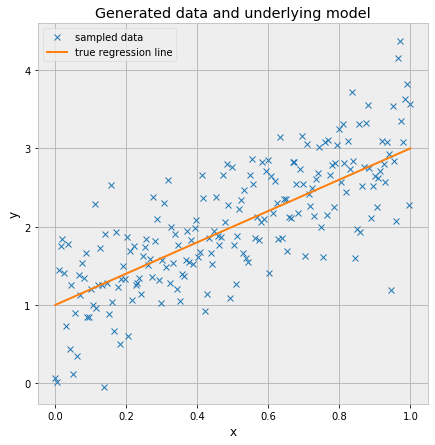

In [81]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

ËÆ©Êàë‰ª¨Â∞ÜË¥ùÂè∂ÊñØÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÊãüÂêàÂà∞Ê≠§Êï∞ÊçÆ„ÄÇ Â¶ÇÊÇ®ÊâÄËßÅÔºåPyMC3‰∏≠ÁöÑÊ®°ÂûãËßÑÊ†ºÂåÖÂê´Âú®withËØ≠Âè•‰∏≠„ÄÇ

Âú®ËøôÈáåÔºåÊàë‰ª¨‰ΩøÁî®‰∫ÜÂæàÊ£íÁöÑÊñ∞NUTSÈááÊ†∑Âô®ÔºàÊàë‰ª¨ÁöÑÊé®Êñ≠ÊåâÈíÆÔºâÊù•ÁªòÂà∂2000‰∏™ÂêéÈ™åÊ†∑Êú¨„ÄÇ

In [85]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sigma=20)
    x_coeff = pm.Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = pm.sample(3000, cores=1) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [x, Intercept, sigma]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3500/3500 [00:05<00:00, 638.53it/s]


ÂØπ‰∫éÁÜüÊÇâÊ¶ÇÁéáÁºñÁ®ãÁöÑ‰∫∫Êù•ËØ¥ÔºåËøôÂ∫îËØ•ÊòØÁõ∏ÂΩìÂèØËØªÁöÑ„ÄÇ ‰ΩÜÊòØÔºåÊàëÁöÑÈùûÁªüËÆ°‰∫∫ÂëòÊúãÂèã‰ºöÁü•ÈÅìËøô‰∏ÄÂàáÂêóÔºü Ê≠§Â§ñÔºåÂõûÊÉ≥‰∏Ä‰∏ãÔºåËøôÊòØ‰∏Ä‰∏™ÈùûÂ∏∏ÁÆÄÂçïÁöÑÊ®°ÂûãÔºåÂú®R‰∏≠Âè™ÊòØ‰∏ÄË°å„ÄÇÊã•ÊúâÂ§ö‰∏™ÂèØËÉΩËΩ¨Êç¢ÁöÑÂõûÂΩíÂèòÈáèÔºå‰∫§‰∫íÈ°πÊàñÈìæÊé•ÂáΩÊï∞‰πüÂ∞Ü‰ΩøÂÖ∂Êõ¥Âä†Â§çÊùÇ‰∏îÊòì‰∫éÂá∫Èîô„ÄÇ
Áõ∏ÂèçÔºåÊñ∞ÁöÑglmÔºàÔºâÂáΩÊï∞ÈááÁî®‰∫ÜPatsyÁ∫øÊÄßÊ®°ÂûãËØ¥ÊòéÁ¨¶Ôºå‰ªé‰∏≠ÂèØ‰ª•ÂàõÂª∫ËÆæËÆ°Áü©Èòµ„ÄÇ ÁÑ∂ÂêéglmÔºàÔºâ‰∏∫ÊØè‰∏™Á≥ªÊï∞Ê∑ªÂä†ÈöèÊú∫ÂèòÈáèÔºåÂπ∂‰∏∫Ê®°ÂûãÊ∑ªÂä†ÈÄÇÂΩìÁöÑÂèØËÉΩÊÄß„ÄÇ

In [87]:
with pm.Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(3000, cores=1) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3500/3500 [00:05<00:00, 635.75it/s]


ÁÆÄÁü≠ÂæóÂ§öÔºå‰ΩÜÊòØÊ≠§‰ª£Á†ÅÊâßË°åÁöÑÂäüËÉΩ‰∏é‰∏äËø∞Ê®°ÂûãËßÑËåÉÂÆåÂÖ®Áõ∏ÂêåÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºåÊÇ®ÂèØ‰ª•Êõ¥ÊîπÂÖàÈ™åÂíåÂÖ∂‰ªñÊâÄÊúâÂÜÖÂÆπÔºâ„ÄÇ glmÔºàÔºâËß£ÊûêPatsyÊ®°ÂûãÂ≠óÁ¨¶‰∏≤Ôºå‰∏∫ÊØè‰∏™ÂõûÂΩíÂèòÈáèÊ∑ªÂä†ÈöèÊú∫ÂèòÈáèÔºàÂú®ËøôÁßçÊÉÖÂÜµ‰∏ã‰∏∫‚ÄúÊà™Ë∑ù‚ÄùÂíå‚ÄúÊñúÁéáx‚ÄùÔºâÔºåÊ∑ªÂä†‰ººÁÑ∂ÊÄßÔºàÈªòËÆ§ÊÉÖÂÜµ‰∏ãÔºåÈÄâÊã©‚ÄúÊ≠£ÊÄÅÂàÜÂ∏É‚ÄùÔºâÔºå‰ª•ÂèäÊâÄÊúâÂÖ∂‰ªñÂèòÈáèÔºàsigmaÔºâ„ÄÇ ÊúÄÂêéÔºåglmÔºàÔºâÁÑ∂ÂêéÈÄöËøá‰ΩøÁî®statsmodels‰º∞ËÆ°‰∏Ä‰∏™È¢ëÁπÅÁ∫øÊÄßÊ®°ÂûãÊù•Â∞ÜÂèÇÊï∞ÂàùÂßãÂåñ‰∏∫‰∏Ä‰∏™Â•ΩÁöÑËµ∑ÁÇπ„ÄÇ

Â¶ÇÊûúÊÇ®‰∏çÁÜüÊÇâRÁöÑËØ≠Ê≥ïÔºåÂàô'y„Äúx'ÊåáÂÆöÊàë‰ª¨Êúâ‰∏Ä‰∏™ËæìÂá∫ÂèòÈáèyÔºåÊàë‰ª¨Â∏åÊúõÂ∞ÜÂÖ∂‰º∞ËÆ°‰∏∫xÁöÑÁ∫øÊÄßÂáΩÊï∞„ÄÇ

Ë¥ùÂè∂ÊñØÊé®ËÆ∫Âπ∂‰∏ç‰ªÖÁªôÊàë‰ª¨‰∏ÄÊù°ÊúÄ‰Ω≥ÊãüÂêàÁ∫øÔºàÊúÄÂ§ß‰ººÁÑ∂Ê≥ïÔºâÔºåËÄå‰∏îËøòÁªô‰∫ÜÊàë‰ª¨ÂèØËÉΩÂèÇÊï∞ÁöÑÊï¥‰∏™ÂêéÈ™åÂàÜÂ∏É„ÄÇ ËÆ©Êàë‰ª¨ÁªòÂà∂ÂèÇÊï∞ÁöÑÂêéÈ™åÂàÜÂ∏É‰ª•ÂèäÁªòÂà∂ÁöÑÂêÑ‰∏™Ê†∑Êú¨„ÄÇ

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

<Figure size 504x504 with 0 Axes>

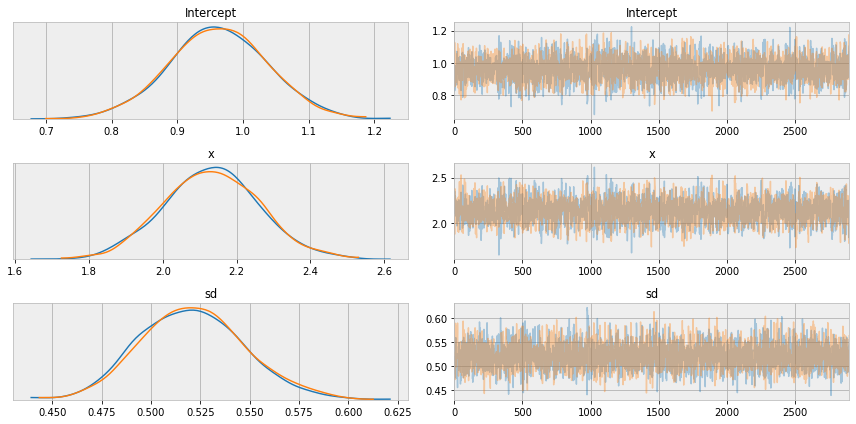

In [88]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace[100:])
plt.tight_layout();

Â∑¶‰æßÊòæÁ§∫‰∫ÜËæπÈôÖÂêéÈ™å‚ÄìÂØπ‰∫éxËΩ¥‰∏äÁöÑÊØè‰∏™ÂèÇÊï∞ÂÄºÔºåÊàë‰ª¨Âú®yËΩ¥‰∏äÈÉΩÊúâ‰∏Ä‰∏™Ê¶ÇÁéáÔºåËØ•Ê¶ÇÁéáÂëäËØâÊàë‰ª¨ËØ•ÂèÇÊï∞ÂÄºÁöÑÂèØËÉΩÊÄß„ÄÇ

ËøôÈáåÊúâÂá†‰ª∂‰∫ãÊÉÖË¶ÅÁúã„ÄÇ È¶ñÂÖàÊòØÊàë‰ª¨ÈíàÂØπÂêÑ‰∏™ÂèÇÊï∞ÔºàÂ∑¶‰æßÔºâÁöÑÈááÊ†∑Èìæ‰ºº‰πéÊî∂Êïõ‰∏îÂπ≥Á®≥ÔºàÊ≤°ÊúâÂ§ßÁöÑÊºÇÁßªÊàñÂÖ∂‰ªñÂ•áÊï∞Ê®°ÂºèÔºâ„ÄÇ

ÂÖ∂Ê¨°ÔºåÊØè‰∏™ÂèòÈáèÁöÑÊúÄÂ§ßÂêéÈ™å‰º∞ËÆ°ÔºàÂ∑¶‰æßÂàÜÂ∏É‰∏≠ÁöÑÂ≥∞ÂÄºÔºâÈùûÂ∏∏Êé•ËøëÁî®‰∫éÁîüÊàêÊï∞ÊçÆÁöÑÁúüÂÆûÂèÇÊï∞ÔºàxÊòØÂõûÂΩíÁ≥ªÊï∞ÔºåËÄåsigmaÊòØÊàë‰ª¨Ê≠£ÊÄÅÂàÜÂ∏ÉÁöÑÊ†áÂáÜÂÅèÂ∑ÆÔºâ„ÄÇ

Âõ†Ê≠§ÔºåÂú®GLM‰∏≠ÔºåÊàë‰ª¨‰∏ç‰ªÖÊúâ‰∏ÄÊù°ÊúÄ‰Ω≥ÊãüÂêàÂõûÂΩíÁ∫øÔºåËÄå‰∏îËøòÊúâËÆ∏Â§ö„ÄÇ ÂêéÈ™åÈ¢ÑÊµãÂõæ‰ªéÂêéÈ™å‰∏≠Ëé∑ÂèñÂ§ö‰∏™Ê†∑Êú¨ÔºàÊà™Ë∑ùÂíåÊñúÁéáÔºâÔºåÂπ∂‰∏∫ÂÆÉ‰ª¨‰∏≠ÁöÑÊØè‰∏Ä‰∏™ÁªòÂà∂‰∏ÄÊù°ÂõûÂΩíÁ∫ø„ÄÇ Âú®ËøôÈáåÔºåÊàë‰ª¨‰∏∫Ê≠§‰ΩøÁî®‰∫Üplot_posterior_predictive_glmÔºàÔºâ‰æøÊç∑ÂáΩÊï∞„ÄÇ

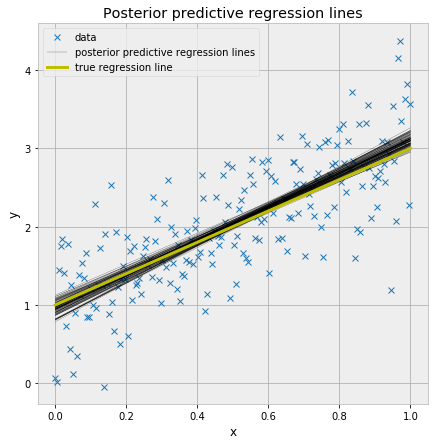

In [90]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

Â¶ÇÊÇ®ÊâÄËßÅÔºåÊàë‰ª¨ÁöÑ‰º∞ËÆ°ÂõûÂΩíÁ∫ø‰∏éÁúüÂÆûÂõûÂΩíÁ∫øÈùûÂ∏∏Áõ∏‰ºº„ÄÇ ‰ΩÜÊòØÁî±‰∫éÊàë‰ª¨Âè™ÊúâÊúâÈôêÁöÑÊï∞ÊçÆÔºåÂõ†Ê≠§Êàë‰ª¨ÁöÑ‰º∞ËÆ°ÂÄºÂ≠òÂú®‰∏çÁ°ÆÂÆöÊÄßÔºåËøôÈáåÁî®Á∫øÁöÑÂèØÂèòÊÄßË°®Á§∫„ÄÇ

### ÊëòË¶Å¬∂
ÂΩìÂâçÔºåÂèØÁî®ÊÄßÊòØÂπøÊ≥õÈááÁî®Ë¥ùÂè∂ÊñØÁªüËÆ°Êï∞ÊçÆÁöÑÂ∑®Â§ßÈöúÁ¢ç„ÄÇ

PyMC3ÂÖÅËÆ∏GLMËßÑËåÉÂÖ∑Êúâ‰ªéRÂÄüÊù•ÁöÑÊñπ‰æøËØ≠Ê≥ï„ÄÇ

ÂêéÈ™åÈ¢ÑÊµãÂõæ‰ΩøÊàë‰ª¨ËÉΩÂ§üËØÑ‰º∞ÊãüÂêàÂ∫¶Âíå‰∏çÁ°ÆÂÆöÊÄß„ÄÇ

### This world is far from Normal(ly distributed): Robust Regression in PyMC3

Âú®ËøôÁØáÂçöÂÆ¢ÊñáÁ´†‰∏≠ÔºåÊàëÂ∞ÜÂÜô‰ª•‰∏ãÂÜÖÂÆπÔºö

Âá†‰∏™Á¶ªÁæ§ÂÄºÂ¶Ç‰ΩïÂú®ÂæàÂ§ßÁ®ãÂ∫¶‰∏äÂΩ±ÂìçÁ∫øÊÄßÂõûÂΩíÊ®°ÂûãÁöÑÊãüÂêà„ÄÇ

Â¶Ç‰ΩïÁî®Student TÂàÜÂ∏É‰ª£ÊõøÊ≠£ÊÄÅ‰ººÁÑ∂‰ºö‰∫ßÁîüÁ®≥ÂÅ•ÁöÑÂõûÂΩí„ÄÇ

ÈÄöËøá‰º†ÈÄíÊóèÂØπË±°ÔºåÂ¶Ç‰Ωï‰ΩøÁî®PyMC3ÂèäÂÖ∂Êñ∞ÁöÑglmÊ®°ÂùóËΩªÊùæÂÆåÊàêÊ≠§Êìç‰Ωú„ÄÇ

ËøôÊòØÂÖ≥‰∫éË¥ùÂè∂ÊñØGLMÁöÑÁ≥ªÂàóÊñáÁ´†ÁöÑÁ¨¨‰∫åÈÉ®ÂàÜÔºàÊúâÂÖ≥Á∫øÊÄßÂõûÂΩíÁöÑÁ¨¨‰∏ÄÈÉ®ÂàÜÔºåËØ∑ÁÇπÂáªÊ≠§Â§ÑÔºâ„ÄÇÂú®‰πãÂâçÁöÑËøôÁØáÊñáÁ´†‰∏≠ÔºåÊàëÊèèËø∞‰∫ÜÂ¶Ç‰ΩïÊúÄÂ∞èÂåñÂõûÂΩíÁ∫øÁöÑÂπ≥ÊñπË∑ùÁ¶ª‰∏éÊúÄÂ§ßÂåñÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑÂèØËÉΩÊÄß‰ª•ÂèäÂπ≥ÂùáÂÄºÊù•Ëá™ÂõûÂΩíÁ∫øÁöÑÂèØËÉΩÊÄß„ÄÇÂêé‰∏ÄÁßçÊ¶ÇÁéáË°®ËææÂºè‰ΩøÊàë‰ª¨ËÉΩÂ§üËΩªÊùæÂú∞Âà∂ÂÆöË¥ùÂè∂ÊñØÁ∫øÊÄßÂõûÂΩíÊ®°Âûã„ÄÇ

ËøôÂú®Ê®°ÊãüÊï∞ÊçÆ‰∏äÈùûÂ∏∏Âá∫Ëâ≤„ÄÇ‰∏çËøáÔºåÊ®°ÊãüÊï∞ÊçÆÁöÑÈóÆÈ¢òÂú®‰∫éÂÆÉÊòØÊ®°ÊãüÁöÑ„ÄÇÂú®Áé∞ÂÆû‰∏ñÁïå‰∏≠Ôºå‰∫ãÊÉÖÂæÄÂæÄÂèòÂæóÊõ¥Âä†Ê∑∑‰π±ÔºåÂπ∂‰∏î‰∏Ä‰∫õÂºÇÂ∏∏ÂÄºÂæàÂÆπÊòìËøùÂèçÊ≠£Â∏∏ÊÄßËøôÊ†∑ÁöÑÂÅáËÆæ„ÄÇ

ËÆ©Êàë‰ª¨ÁúãÁúãÂ¶ÇÊûúÂú®‰∏ä‰∏ÄÁØáÊñáÁ´†ÁöÑÊ®°ÊãüÊï∞ÊçÆ‰∏≠Ê∑ªÂä†‰∏Ä‰∫õÁ¶ªÁæ§ÂÄº‰ºöÂèëÁîü‰ªÄ‰πà„ÄÇ

In [91]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

# Add outliers
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

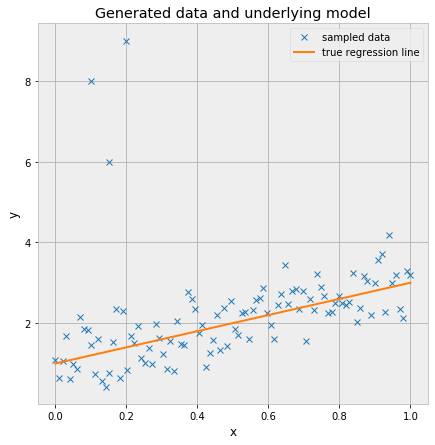

In [92]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x_out, y_out, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

Lets see what happens if we estimate our Bayesian linear regression model using the glm() function as before. This function takes a `Patsy <http://patsy.readthedocs.org/en/latest/quickstart.html>`__ string to describe the linear model and adds a Normal likelihood by default.

In [93]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(2000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, x, Intercept]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:04<00:00, 612.58it/s]


‰∏∫‰∫ÜËØÑ‰º∞ÊãüÂêàÁ®ãÂ∫¶ÔºåÊàëÈÄöËøá‰ªéÂêéÈ™åÂàÜÂ∏É‰∏≠Ëé∑ÂèñÂõûÂΩíÂèÇÊï∞Âπ∂‰∏∫ÊØè‰∏Ä‰∏™ÁªòÂà∂ÂõûÂΩíÁ∫øÊù•ÁªòÂà∂ÂêéÈ™åÈ¢ÑÊµãÂõûÂΩíÁ∫øÔºàËøôÂÖ®ÈÉ®Âú®plot_posterior_predictiveÔºàÔºâÂÜÖÈÉ®ÂÆåÊàêÔºâ„ÄÇ

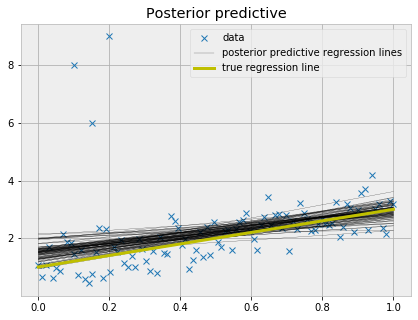

In [94]:
plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')

plt.legend(loc=0);

Â¶ÇÊÇ®ÊâÄËßÅÔºåÊãüÂêàÂ∫¶ÈùûÂ∏∏ÂÅèÊñúÔºåÂπ∂‰∏îÊàë‰ª¨ÁöÑ‰º∞ËÆ°‰∏≠Â≠òÂú®Áõ∏ÂΩìÂ§öÁöÑ‰∏çÁ°ÆÂÆöÊÄßÔºåËøôÁî±Â§ßÈáè‰∏çÂêåÁöÑÂêéÈ™åÈ¢ÑÊµãÂõûÂΩíÁ∫øË°®Êòé„ÄÇ ‰∏∫‰ªÄ‰πàÊòØËøôÊ†∑Ôºü ÂéüÂõ†ÊòØÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑÂ∞æÈÉ®Ê≤°ÊúâÂæàÂ§öË¥®ÈáèÔºåÂõ†Ê≠§ÔºåÂºÇÂ∏∏ÂÄº‰ºö‰∏•ÈáçÂΩ±ÂìçÊãüÂêà„ÄÇ

È¢ëÁéáËÆ∫ËÄÖ‰ºö‰º∞ËÆ°È≤ÅÊ£íÂõûÂΩíÔºåÂπ∂‰ΩøÁî®Èùû‰∫åÊ¨°Ë∑ùÁ¶ªÂ∫¶ÈáèÊù•ËØÑ‰º∞ÊãüÂêà„ÄÇ

‰ΩÜÊòØË¥ùÂè∂ÊñØÊÄé‰πàÂäûÔºü Áî±‰∫éÈóÆÈ¢òÂú®‰∫éÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑÂ∞æÂ∑¥ÔºåÂõ†Ê≠§Êàë‰ª¨ÂèØ‰ª•ÂÅáËÆæÊàë‰ª¨ÁöÑÊï∞ÊçÆ‰∏çÊòØÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåËÄåÊòØÊ†πÊçÆÂ≠¶ÁîüTÂàÜÂ∏ÉËøõË°åÂàÜÂ∏ÉÔºåÂêéËÄÖÂÖ∑ÊúâËæÉÈáçÁöÑÂ∞æÂ∑¥ÔºåÂ¶Ç‰∏ãÊâÄÁ§∫ÔºàÊàëÂú®‚Äú The Kruschke‚Äù‰∏≠‰∫ÜËß£‰∫ÜËøô‰∏ÄÊäÄÂ∑ßÔºå akaÂ∞èÁãó‰π¶Ôºõ‰ΩÜÊàëËÆ§‰∏∫GelmanÊòØÁ¨¨‰∏Ä‰∏™ÊèêÂá∫Ê≠§‰π¶ÁöÑ‰∫∫„ÄÇ

ËÆ©Êàë‰ª¨Áúã‰∏Ä‰∏ãËøô‰∏§ÁßçÂàÜÂ∏ÉÔºå‰ª•‰∫ÜËß£ÂÆÉ‰ª¨„ÄÇ

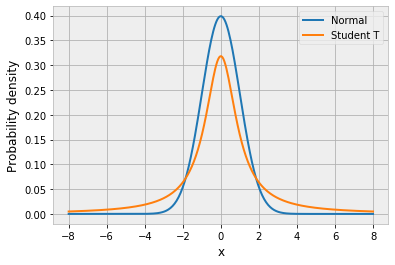

In [96]:
import theano
normal_dist = pm.Normal.dist(mu=0, sigma=1)
t_dist = pm.StudentT.dist(mu=0, lam=1, nu=1)
x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();

Ê≠£Â¶ÇÊÇ®ÊâÄÁúãÂà∞ÁöÑÔºåÂú®TÂàÜÂ∏É‰∏ãÊØîÂú®Ê≠£ÊÄÅÂàÜÂ∏É‰∏ãÔºåËøúÁ¶ªÂùáÂÄºÔºàÂú®ËøôÁßçÊÉÖÂÜµ‰∏ã‰∏∫0ÔºâÁöÑÂÄºÁöÑÂèØËÉΩÊÄßÊõ¥Â§ß„ÄÇ

Ë¶ÅÂÆö‰πâPyMC3‰∏≠TÂàÜÂ∏ÉÁöÑÁî®Ê≥ïÔºåÊàë‰ª¨ÂèØ‰ª•‰º†ÈÄí‰∏Ä‰∏™ÂÆ∂Â∫≠ÂØπË±°TÔºåËØ•ÂØπË±°ÊåáÂÆöÊàë‰ª¨ÁöÑÊï∞ÊçÆÊòØÂ≠¶ÁîüTÂàÜÂ∏ÉÁöÑÔºàÊõ¥Â§öÈÄâÊã©ËØ∑ÂèÇËßÅglm.familiesÔºâ„ÄÇ ËØ∑Ê≥®ÊÑèÔºåËøô‰∏éRÂíåstatsmodels‰ΩøÁî®ÁöÑËØ≠Ê≥ïÁõ∏Âêå„ÄÇ

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [lam, x, Intercept]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:04<00:00, 609.75it/s]


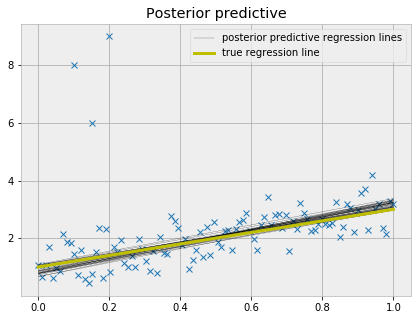

In [97]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x', data, family=family)
    trace_robust = pm.sample(2000, cores=1)

plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x')
pm.plot_posterior_predictive_glm(trace_robust,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')
plt.legend();

Âú®ÈÇ£ÈáåÔºåÂ•ΩÂ§ö‰∫ÜÔºÅÁ¶ªÁæ§ÂÄºÂá†‰πé‰∏ç‰ºöÂΩ±ÂìçÊàë‰ª¨ÁöÑ‰º∞ËÆ°ÔºåÂõ†‰∏∫Êàë‰ª¨ÁöÑ‰ººÁÑ∂ÂáΩÊï∞ÂÅáËÆæÁ¶ªÁæ§ÂÄºÊØîÊ≠£ÊÄÅÂàÜÂ∏É‰∏ãÁöÑÂèØËÉΩÊÄßÂ§ßÂæóÂ§ö„ÄÇ

### ÊëòË¶Å¬∂
PyMC3ÁöÑglmÔºàÔºâÂáΩÊï∞ÂÖÅËÆ∏ÊÇ®‰º†ÂÖ•ÂåÖÂê´ÊúâÂÖ≥ÂèØËÉΩÊÄßÁöÑ‰ø°ÊÅØÁöÑÊóèÂØπË±°„ÄÇ

ÈÄöËøáÂ∞Ü‰ººÁÑ∂ÊÄß‰ªéÊ≠£ÊÄÅÂàÜÂ∏ÉÊõ¥Êîπ‰∏∫Â≠¶ÁîüTÂàÜÂ∏ÉÔºàÂ∞æÈÉ®ÂÖ∑ÊúâÊõ¥Â§ßÁöÑË¥®ÈáèÔºâÔºåÊàë‰ª¨ÂèØ‰ª•ÊâßË°åÁ®≥ÂÅ•ÂõûÂΩí„ÄÇ

‰∏ã‰∏ÄÁØáÊñáÁ´†Â∞Ü‰ªãÁªçPyMC3‰∏≠ÁöÑÈÄªËæëÂõûÂΩí‰ª•ÂèäÂêéÈ™åÂíåÁáïÈ∫¶ÁâáÁöÑÂÖ±ÂêåÁÇπ„ÄÇ

Êâ©ÂÖÖÂäüËÉΩÔºö

Èô§ÂùáÂÄºÂíåÊñπÂ∑ÆÂ§ñÔºåStudent-TÂàÜÂ∏ÉËøòÂÖ∑ÊúâÁß∞‰∏∫Ëá™Áî±Â∫¶ÁöÑÁ¨¨‰∏â‰∏™ÂèÇÊï∞ÔºåËØ•ÂèÇÊï∞ÊèèËø∞Â∫îÂú®Â∞æÂ∑¥‰∏≠ÊîæÂ§öÂ∞ëË¥®Èáè„ÄÇÊ≠§Â§ÑÂ∞ÜÂÖ∂ËÆæÁΩÆ‰∏∫1Ôºå‰ª•Ëµã‰∫àÂ∞æÂ∑¥ÊúÄÂ§ßË¥®ÈáèÔºàÂ∞ÜÂÖ∂ËÆæÁΩÆ‰∏∫Êó†Á©∑Â§ßÂ∞ÜÂØºËá¥Ê≠£ÊÄÅÂàÜÂ∏ÉÔºÅÔºâ„ÄÇ‰∏Ä‰∏™‰∫∫ÂèØ‰ª•ÂæàÂÆπÊòìÂú∞Â∞ÜÂÆÉÊîæÂú®ÂÖàË°åËÄå‰∏çÊòØÂõ∫ÂÆöÂÆÉÔºåÊàëÁïôÁªôËØªËÄÖ‰Ωú‰∏∫ÁªÉ‰π†ÔºõÔºâ„ÄÇ

TÂàÜÂ∏É‰πüÂèØ‰ª•Áî®‰ΩúÂÖàÈ™å„ÄÇÊàëÂ∞ÜÂú®‰ª•ÂêéÊúâÂÖ≥ÂàÜÂ±ÇGLMÁöÑÊñáÁ´†‰∏≠ÂØπÊ≠§ËøõË°åÂ±ïÁ§∫„ÄÇ

### The Best Of Both Worlds: Hierarchical Linear Regression in PyMC3
Êú¨ÊïôÁ®ãÊîπÁºñËá™Danne ElbersÂíåThomas WieckiÁöÑÂçöÂÆ¢ÊñáÁ´†Ôºå‚Äú‰∏§ÂÖ®ÂÖ∂ÁæéÔºöPyMC3‰∏≠ÁöÑÂàÜÂ±ÇÁ∫øÊÄßÂõûÂΩí‚Äù„ÄÇ

‰ªäÂ§©ÁöÑÂçöÂÆ¢ÊñáÁ´†Áî±Danne ElbersÂÖ±ÂêåÊí∞ÂÜôÔºåÂ•πÊ≠£Âú®‰∏éÊàë‰∏ÄËµ∑ÂÆåÊàêÊúâÂÖ≥‰ΩøÁî®Ë¥ùÂè∂ÊñØÂª∫Ê®°ÁöÑËÆ°ÁÆóÁ≤æÁ•ûÁóÖÂ≠¶ÁöÑÁ°ïÂ£´ËÆ∫Êñá„ÄÇËØ•Â∏ñÂ≠êËøòÂ§ßÈáèÂÄüÈâ¥‰∫ÜChris FonnesbeckÁöÑÁ¨îËÆ∞Êú¨„ÄÇ

ÂΩìÊàëÁ¨¨‰∏ÄÊ¨°Ë¢´ÂºïÂÖ•Â±ÇÊ¨°Âª∫Ê®°Êó∂ÔºåË¥ùÂè∂ÊñØÂª∫Ê®°ÁöÑÂäõÈáèÁúüÁöÑËÆ©ÊàëÂ§ßÂêÉ‰∏ÄÊÉä„ÄÇÂú®Ê≠§ÂçöÂÆ¢ÊñáÁ´†‰∏≠ÔºåÊàë‰ª¨Â∞ÜÔºö

Êèê‰æõÁõ¥ËßÇÁöÑÂàÜÂ±Ç/Â§öÁ∫ßË¥ùÂè∂ÊñØÂª∫Ê®°ËØ¥ÊòéÔºõ

Â±ïÁ§∫Â¶Ç‰ΩïÂú®PyMC3‰∏≠ËΩªÊùæÊûÑÂª∫ÂíåËØÑ‰º∞Ê≠§Á±ªÊ®°ÂûãÔºõ

ÈÄöËøáÊØîËæÉ‰∏§ËÄÖÔºåÂ±ïÁ§∫‰ΩøÁî®ÂàÜÂ±ÇË¥ùÂè∂ÊñØÂª∫Ê®°Áõ∏ÂØπ‰∫éÈùûÂàÜÂ±ÇË¥ùÂè∂ÊñØÂª∫Ê®°ÁöÑ‰ºòÂäøÔºõ

ÂèØËßÜÂåñ‚ÄúÊî∂Áº©ÊïàÊûú‚ÄùÔºàÂ¶Ç‰∏ãÊâÄËø∞ÔºâÔºõÂπ∂Á™ÅÂá∫ÊòæÁ§∫ËØ•Ê®°ÂûãÁöÑÈ¢ëÁéáÁâà„ÄÇ

ÊÄªÊòØÊúâÂ§öÁªÑÁõ∏ÂÖ≥ÁöÑÂ∫¶ÈáèÂÄºÂá∫Áé∞„ÄÇ‰æãÂ¶ÇÔºåÂú®Êï∞Â≠¶ÂøÉÁêÜÂ≠¶‰∏≠ÔºåÊÇ®Ë¶ÅÂú®Âêå‰∏Ä‰ªªÂä°‰∏äÊµãËØïÂ§ö‰∏™ÁßëÁõÆ„ÄÇÁÑ∂ÂêéÔºåÊàë‰ª¨ÊÉ≥Ë¶Å‰º∞ËÆ°‰∏Ä‰∏™ÈÄöËøá‰∏ÄÁªÑÂèÇÊï∞ÊèèËø∞‰ªªÂä°Ë°å‰∏∫ÁöÑËÆ°ÁÆó/Êï∞Â≠¶Ê®°Âûã„ÄÇÂõ†Ê≠§ÔºåÂÅáËÆæ‰ªñ‰ª¨Ê≤°ÊúâÁõ∏‰ºº‰πãÂ§ÑÔºåÊàë‰ª¨ÂèØ‰ª•ÂØπÊØè‰∏™‰∏ªÈ¢òÂàÜÂà´ÊãüÂêàÊ®°Âûã„ÄÇÊàñËÄÖÔºåÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆÂπ∂ÂÅáËÆæÊâÄÊúâ‰∏ªÈ¢òÈÉΩÁõ∏ÂêåÔºåÂàô‰º∞ËÆ°‰∏Ä‰∏™Ê®°Âûã„ÄÇÂ±ÇÊ¨°Âª∫Ê®°ÈÄöËøáÂØπ‰∏ªÈ¢òÁöÑÁõ∏‰ººÊÄßËøõË°åÂª∫Ê®°Êù•ÂÆûÁé∞‰∏§ÂÖ®ÂÖ∂ÁæéÔºåÂêåÊó∂‰πüÂèØ‰ª•‰º∞ËÆ°ÂêÑ‰∏™ÂèÇÊï∞„ÄÇÈ°∫‰æøËØ¥‰∏ÄÂè•ÔºåÊàë‰ª¨ÂÆûÈ™åÂÆ§ÁöÑËΩØ‰ª∂HDDMÂÖÅËÆ∏ÂØπÂπøÊ≥õ‰ΩøÁî®ÁöÑÂøÉÁêÜÂ≠¶ÂÜ≥Á≠ñÊ®°ÂûãËøõË°åÂàÜÂ±ÇË¥ùÂè∂ÊñØ‰º∞ËÆ°„ÄÇ‰ΩÜÊòØÔºåÂú®Ê≠§ÂçöÂÆ¢ÊñáÁ´†‰∏≠ÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî®ÂàÜÂ±ÇÁ∫øÊÄßÂõûÂΩíÁöÑÊõ¥ÁªèÂÖ∏Á§∫‰æãÊù•È¢ÑÊµãÊàøÂ±ã‰∏≠ÁöÑÊ∞°Ê∞¥Âπ≥„ÄÇ

GelmanÁ≠â‰∫∫Ôºà2007ÔºâÁöÑraÊ∞îÊï∞ÊçÆÈõÜÊòØÂàÜÂ±ÇÂª∫Ê®°ÁöÑÁªèÂÖ∏‰πã‰Ωú„ÄÇ Âú®Ê≠§Êï∞ÊçÆÈõÜ‰∏≠ÔºåÂ∑≤ÊµãÈáè‰∫ÜÂ§ö‰∏™Â∑ûÊâÄÊúâÂéø‰∏≠‰∏çÂêåÂÆ∂Â∫≠‰πãÈó¥ÁöÑÊîæÂ∞ÑÊÄßÊ∞î‰ΩìraÂê´Èáè„ÄÇ Âú®ÈùûÂê∏ÁÉüËÄÖ‰∏≠ÔºåÊ∞îÊòØÂºïËµ∑ËÇ∫ÁôåÁöÑÊúÄÈ´òÂéüÂõ†„ÄÇ ÊçÆËÆ§‰∏∫ÔºåÂÆÉÂú®ÊúâÂú∞‰∏ãÂÆ§ÁöÑÂÆ∂Â∫≠‰∏≠Êõ¥Â∏∏ËßÅÔºåÂπ∂‰∏îÂú®ÂúüÂ£§Á±ªÂûã‰πãÈó¥ÁöÑÂê´Èáè‰πü‰∏çÂêå„ÄÇ Âú®ËøôÈáåÔºåÊàë‰ª¨Â∞ÜË∞ÉÊü•ËøôÁßçÂ∑ÆÂºÇÔºåÂπ∂Ê†πÊçÆÂéøÊú¨Ë∫´ÂíåÂú∞‰∏ãÂÆ§ÁöÑÂ≠òÂú®Êù•È¢ÑÊµã‰∏çÂêåÂéøÁöÑraÊ∞¥Âπ≥„ÄÇ Âú®Ê≠§Á§∫‰æã‰∏≠ÔºåÊàë‰ª¨Â∞ÜËÄÉÂØüÊòéÂ∞ºËãèËææÂ∑ûÔºåËØ•Â∑ûÂåÖÂê´85‰∏™ÂéøÔºåÂú®ËØ•ÂéøËøõË°å‰∫Ü‰∏çÂêåÁöÑÊµãÈáèÔºåÊØè‰∏™ÂéøÁöÑÊµãÈáèËåÉÂõ¥‰ªé2Âà∞116‰∏™„ÄÇ

In [98]:
data = pd.read_csv(pm.get_data('radon.csv'))
data['log_radon'] = data['log_radon'].astype(theano.config.floatX)
county_names = data.county.unique()
county_idx = data.county_code.values

n_counties = len(data.county.unique())

In [107]:
county_idx 

array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       19, 19, 19, 20, 20

In [99]:
data[['county', 'log_radon', 'floor']].head()

county  log_radon  floor
0  AITKIN   0.832909    1.0
1  AITKIN   0.832909    0.0
2  AITKIN   1.098612    0.0
3  AITKIN   0.095310    0.0
4   ANOKA   1.163151    0.0

Â¶ÇÊÇ®ÊâÄËßÅÔºåÂú®‰∏Ä‰∏™Âéø‰∏≠ÔºåÊàë‰ª¨ËøõË°å‰∫ÜÂ§öÊ¨°measurementsÊµãÈáèÔºàÂØπÊï∞ËΩ¨Êç¢‰∏∫ÂÆûÁ∫øÔºâ‚ÄìÊØè‰∏™ÊàøÂ±ã‰∏ÄË°å‚ÄìÊàøÂ±ãÊòØÂê¶ÊúâÂú∞‰∏ãÂÆ§ÔºàÂú∞Êùø== 0ÔºâÔºàÂú∞Êùø== 0Ôºâ 1Ôºâ„ÄÇ Êàë‰ª¨ÂØπÊã•ÊúâÂú∞‰∏ãÂÆ§ÊòØÂê¶‰ºöÂ¢ûÂä†ÊàøÂ≠ê‰∏≠ÊµãÂæóÁöÑraÊÑüÂÖ¥Ë∂£„ÄÇ

Áé∞Âú®ÊÇ®ÂèØËÉΩ‰ºöËØ¥Ôºö‚ÄúÈÇ£ÂæàÂÆπÊòìÔºÅ ÊàëÂ∞ÜÊ±áÊÄªÊâÄÊúâÊï∞ÊçÆÂπ∂‰º∞ËÆ°‰∏Ä‰∏™Â§ßÂõûÂΩíÔºå‰ª•ËØÑ‰º∞Âú∞‰∏ãÂÆ§ÂØπÊâÄÊúâÂéøÁöÑÂΩ±Âìç„ÄÇ‚Äù Áî®Êï∞Â≠¶ÁöÑËØùËÆ≤ÔºåËØ•Ê®°ÂûãÊòØÔºö

$radoni,c=Œ±+Œ≤‚àófloori,c+œµ$

Âú®i‰ª£Ë°®ÊµãÈáèÂÄºÁöÑÊÉÖÂÜµ‰∏ãÔºåÂ¶ÇÊûúÊàøÂ±ãÊúâÂú∞‰∏ãÂÆ§ÔºåÂàôÂéøÂíåÊ•ºÂ±ÇÂàÜÂà´ÂåÖÂê´0Êàñ1„ÄÇ Â¶ÇÊûúÊÇ®ÈúÄË¶ÅÊúâÂÖ≥PyMC‰∏≠Á∫øÊÄßÂõûÂΩíÁöÑÂ§ç‰π†ÔºåËØ∑Êü•ÁúãÊàë‰ª•ÂâçÁöÑÂçöÂÆ¢ÊñáÁ´†„ÄÇ Ëá≥ÂÖ≥ÈáçË¶ÅÁöÑÊòØÔºåÂ¶Ç‰∏ãÂõæÊâÄÁ§∫ÔºåÊàë‰ª¨‰ªÖÈíàÂØπÊâÄÊúâÊ±áËÅöÂéøÁöÑÊâÄÊúâÂ∫¶ÈáèÂÄº‰º∞ËÆ°‰∏Ä‰∏™Êà™Ë∑ùÂíå‰∏Ä‰∏™ÊñúÁéáÔºàÂú®Êàë‰ª¨ÁöÑÊ°à‰æã‰∏≠ÔºåŒ∏Ë°®Á§∫ÔºàŒ±ÔºåŒ≤ÔºâÔºåyiÊòØÁ¨¨i‰∏™ÂéøÁöÑÂ∫¶ÈáèÂÄºÔºâ„ÄÇ

Êú™ÂêàÂπ∂ÁöÑÂ∫¶ÈáèÔºöÂçïÁã¨ÁöÑÂõûÂΩí¬∂
‰ΩÜÊòØÔºåÂ¶ÇÊûúÊàë‰ª¨ÂØπ‰∏çÂêåÂéøÂÆûÈôÖ‰∏äÊòØÂê¶ÂÖ∑Êúâ‰∏çÂêåÁöÑÂÖ≥Á≥ªÔºàÂù°Â∫¶ÔºâÂíå‰∏çÂêåÁöÑbaseÂü∫ÁéáÔºàÊã¶Êà™ÔºâÊÑüÂÖ¥Ë∂£ÔºåËØ•ÊÄé‰πàÂäûÔºü ÁÑ∂ÂêéÊÇ®ÂèØËÉΩ‰ºöËØ¥Ôºö‚ÄúÂ•ΩÂêßÔºåÊàëÂè™‰º∞ÁÆón‰∏™ÔºàÂéøÁöÑÊï∞ÈáèÔºâ‰∏çÂêåÁöÑÂõûÂΩí-ÊØè‰∏™Âéø‰∏Ä‰∏™‚Äù„ÄÇ Áî®Êï∞Â≠¶ÁöÑËØùËÆ≤ÔºåËØ•Ê®°ÂûãÊòØÔºö

$radoni,c=Œ±c+Œ≤c‚àófloori,c+œµ_c$

ËøôÊòØÊûÅÁ´ØÁõ∏ÂèçÁöÑÊ®°Âûã„ÄÇ Âú®‰∏äÈù¢Êàë‰ª¨ÂÅáËÆæÊâÄÊúâÂéøÈÉΩÂÆåÂÖ®Áõ∏ÂêåÁöÑÂú∞ÊñπÔºåÂú®ËøôÈáåÊàë‰ª¨ËØ¥ÁöÑÊòØÂÆÉ‰ª¨‰πãÈó¥Ê≤°Êúâ‰ªª‰ΩïÁõ∏‰ºº‰πãÂ§Ñ„ÄÇ Â¶Ç‰∏ãÊâÄÁ§∫ÔºåÂΩìÊØè‰∏™ÂéøÁöÑÊï∞ÊçÆÂæàÂ∞ëÊó∂ÔºåËøôÁßçÁ±ªÂûãÁöÑÊ®°ÂûãÂèØËÉΩ‰ºöÈùûÂ∏∏ÂòàÊùÇÔºåÂ∞±ÂÉèËØ•Êï∞ÊçÆÈõÜ‰∏≠ÁöÑÊÉÖÂÜµ‰∏ÄÊ†∑„ÄÇ

### Â±ÄÈÉ®Ê±†ÂåñÔºöÂèàÁß∞ÂàÜÂ±ÇÂõûÂΩíÔºå‰∏§ÂÖ®ÂÖ∂Áæé
Âπ∏ËøêÁöÑÊòØÔºåËøô‰∏§‰∏™ÊûÅÁ´ØÈÉΩÊúâ‰∏≠Èó¥Á´ãÂú∫„ÄÇ ÂÖ∑‰ΩìÊù•ËØ¥ÔºåÊàë‰ª¨ÂèØ‰ª•ÂÅáËÆæÂ∞ΩÁÆ°ÊØè‰∏™ÂéøÂéøÁöÑŒ±sÂíåŒ≤sÈÉΩ‰∏çÂêåÔºàÂ¶ÇÈùûÂêàÂπ∂Ê°à‰æãÔºâÔºå‰ΩÜÁ≥ªÊï∞ÈÉΩÂÖ∑ÊúâÁõ∏‰ººÊÄß„ÄÇ Êàë‰ª¨ÂèØ‰ª•ÈÄöËøáÂÅáËÆæÊØè‰∏™Á≥ªÊï∞ÈÉΩÊù•Ëá™‰∏Ä‰∏™ÂÖ±ÂêåÁöÑÁªÑÂàÜÂ∏ÉÊù•ÂØπÊ≠§Âª∫Ê®°Ôºö

Œ±c‚àºN(ŒºŒ±,œÉ2Œ±)
 
Œ≤c‚àºN(ŒºŒ≤,œÉ2Œ≤)

Âõ†Ê≠§ÔºåÊàë‰ª¨ÂÅáËÆæÊà™Ë∑ùŒ±ÂíåÊñúÁéáŒ≤Êù•Ëá™‰ª•Ê≠£ÊÄÅÂàÜÂ∏É‰∏∫‰∏≠ÂøÉÁöÑÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåÊ≠£ÊÄÅÂàÜÂ∏É‰ª•ÂêÑËá™ÁöÑÂùáÂÄºŒº‰∏∫‰∏≠ÂøÉÔºå‰∏îÂÖ∑Êúâ‰∏ÄÂÆöÁöÑÊ†áÂáÜÂÅèÂ∑ÆœÉ2ÔºåÊàë‰ª¨‰πü‰º∞ËÆ°‰∫ÜËøô‰∫õÂÄºÔºàÊàñÊõ¥Á°ÆÂàáÂú∞ËØ¥ÊòØÂêéÈ™åÔºâ„ÄÇ ËøôÂ∞±ÊòØ‰∏∫‰ªÄ‰πàÂ∞ÜÂÖ∂Áß∞‰∏∫Â§öÁ∫ßÔºåÂàÜÂ±ÇÊàñÈÉ®ÂàÜÊ±†Âª∫Ê®°ÁöÑÂéüÂõ†„ÄÇ

![title](e_4.png)

Êàë‰ª¨Â¶Ç‰Ωï‰º∞ÁÆóÊÇ®ÂèØËÉΩ‰ºöÈóÆÁöÑÂ§çÊùÇÊ®°ÂûãÔºü ÂóØÔºåËøôÂ∞±ÊòØÊ¶ÇÁéáÁºñÁ®ãÁöÑÁæé‚ÄìÊàë‰ª¨Âè™Ë¶ÅÂà∂ÂÆöÊâÄÈúÄÁöÑÊ®°ÂûãÔºåÁÑ∂ÂêéÊåâÊàë‰ª¨ÁöÑÊé®ÁêÜÊåâÈíÆÔºàTMÔºâ„ÄÇ

ÔºàËØ∑Ê≥®ÊÑèÔºåÁî±‰∫éÊàë‰ª¨Â∞öÊú™ÂÆö‰πâÂÖàÈ™åÊàñË∂ÖÂÖàÈ™åÊù°‰ª∂ÔºàÂç≥ÂàÜÁªÑÂàÜÂ∏ÉÁöÑÂÖàÈ™åÊù°‰ª∂ŒºÂíåœÉÔºâÔºåÂõ†Ê≠§‰∏äËø∞ÂÜÖÂÆπÂπ∂‰∏çÊòØÂÆåÊï¥ÁöÑË¥ùÂè∂ÊñØÊ®°ÂûãËßÑËåÉ„ÄÇÂÆÉ‰ª¨Â∞ÜÂú®‰∏ãÈù¢ÁöÑÊ®°ÂûãÂÆûÁé∞‰∏≠‰ΩøÁî®Ôºå‰ΩÜ‰ªÖÂú®Ê≠§Â§ÑËøõË°åÂàÜÂøÉ„ÄÇÔºâ

Ê¶ÇÁéáÁºñÁ®ã
ÈùûÊ±†Âåñ/ÈùûÂàÜÂ±ÇÊ®°Âûã
‰∏∫‰∫ÜÂº∫Ë∞ÉÂàÜÂ±ÇÁ∫øÊÄßÂõûÂΩíÁöÑÊïàÊûúÔºåÊàë‰ª¨È¶ñÂÖàÂ∞Ü‰ªé‰∏äÊñπ‰º∞ÁÆóÈùûÂàÜÂ±ÇÔºåÊú™ÂêàÂπ∂ÁöÑË¥ùÂè∂ÊñØÊ®°ÂûãÔºàÂçïÁã¨ÁöÑÂõûÂΩíÔºâ„ÄÇ ÂØπ‰∫éÊØè‰∏™ÂéøÔºåÊàë‰ª¨‰º∞ËÆ°‰∏Ä‰∏™ÂÆåÂÖ®Áã¨Á´ãÁöÑÂùáÂÄºÔºàÊà™Ë∑ùÔºâ„ÄÇ Áî±‰∫éÊàë‰ª¨Ê≤°ÊúâÂÖ≥‰∫éÊã¶Êà™ÊàñÂõûÂΩíÁöÑÂèØËÉΩ‰ø°ÊÅØÔºåÂõ†Ê≠§Êàë‰ª¨Â∞Ü‰ΩøÁî®‰ª•0‰∏∫‰∏≠ÂøÉÔºåÊ≠£ÊÄÅÂàÜÂ∏ÉËæÉÂ§ßÁöÑÊ≠£ÊÄÅÂàÜÂ∏ÉÊù•ÊèèËø∞Êã¶Êà™ÂíåÂõûÂΩí„ÄÇ Êàë‰ª¨ÂÅáËÆæÊµãÈáèÂÄºÂëàÊ≠£ÊÄÅÂàÜÂ∏ÉÂπ∂Â∏¶ÊúâÂô™Â£∞œµÔºåÁÑ∂ÂêéÂ∞ÜÂÖ∂ÂùáÂåÄÂàÜÂ∏É„ÄÇ

In [101]:
with pm.Model() as unpooled_model:

    # Independent parameters for each county
    a = pm.Normal('a', 0, sigma=100, shape=n_counties)
    b = pm.Normal('b', 0, sigma=100, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5)

    # Model prediction of radon level
    # a[county_idx] translates to a[0, 0, 0, 1, 1, ...],
    # we thus link multiple household measures of a county
    # to its coefficients.
    radon_est = a[county_idx] + b[county_idx]*data.floor.values

    # Data likelihood
    y = pm.Normal('y', radon_est, sigma=eps, observed=data.log_radon)

In [102]:
with unpooled_model:
    unpooled_trace = pm.sample(2000,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [eps, b, a]
Sampling chain 1, 0 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2500/2500 [00:12<00:00, 200.92it/s]


Â±ÇÊ¨°Ê®°Âûã
ÂàÜÂ±ÇÊ®°ÂûãÊ≤°ÊúâÂàõÂª∫ÂàÜÁ¶ªÁöÑÊ®°ÂûãÔºåËÄåÊòØÂàõÂª∫‰∫ÜÁªÑÂèÇÊï∞ÔºåËØ•ÁªÑÂèÇÊï∞ËÄÉËôëÁöÑÂéøÂπ∂‰∏çÂÆåÂÖ®‰∏çÂêåÔºåËÄåÊòØÂÖ∑ÊúâÊΩúÂú®ÁöÑÁõ∏‰ººÊÄß„ÄÇ Ëøô‰∫õÂàÜÂ∏ÉÈöèÂêéÁî®‰∫éÂΩ±ÂìçÊØè‰∏™ÂéøÁöÑŒ±ÂíåŒ≤ÁöÑÂàÜÂ∏É„ÄÇ

In [103]:
with pm.Model() as hierarchical_model:
    # Hyperpriors for group nodes
    mu_a = pm.Normal('mu_a', mu=0., sigma=100)
    sigma_a = pm.HalfNormal('sigma_a', 5.)
    mu_b = pm.Normal('mu_b', mu=0., sigma=100)
    sigma_b = pm.HalfNormal('sigma_b', 5.)

    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_counties)
    # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    radon_est = a[county_idx] + b[county_idx]*data.floor.values

    # Data likelihood
    radon_like = pm.Normal('radon_like', mu=radon_est,
                           sigma=eps, observed=data.log_radon)

In [104]:
# Inference button (TM)!
with hierarchical_model:
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9,cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [eps, b, a, sigma_b, mu_b, sigma_a, mu_a]
Sampling chain 1, 3 divergences: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4000/4000 [00:34<00:00, 117.23it/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


ÁªòÂà∂ÂàÜÂ±ÇÊ®°ÂûãË∑üË∏™-ÂÖ∂ÂèëÁé∞ÁöÑÂÄº-‰ªé2000Âπ¥ÂºÄÂßãËø≠‰ª£ÔºàÂè≥‰æßÂõæÔºâÂèäÂÖ∂Á¥ØÁßØÁöÑËæπÈôÖÂÄºÔºàÂ∑¶‰æßÂõæÔºâ

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

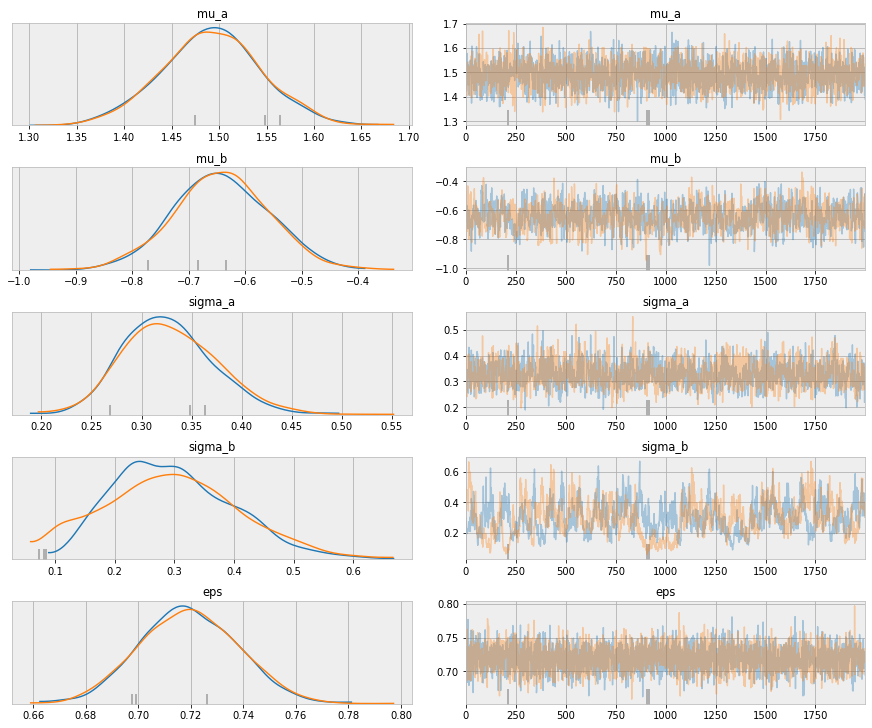

In [105]:
pm.traceplot(hierarchical_trace,
             var_names=['mu_a', 'mu_b',
                        'sigma_a', 'sigma_b',
                        'eps']);

C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\zhaolei\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument

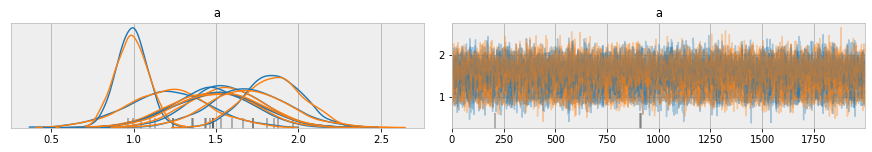

In [108]:
pm.traceplot(hierarchical_trace,
             var_names=['a'], coords={'a_dim_0': range(8)});

Â∑¶Ê†è‰∏≠ÁöÑËæπÁºòÂêéÈ™åÂÖ∑Êúâ‰∏∞ÂØåÁöÑ‰ø°ÊÅØ„ÄÇ mu_aÂëäËØâÊàë‰ª¨ËØ•ÁªÑÁöÑÂπ≥ÂùáÔºàÂØπÊï∞ÔºâraÊ∞¥Âπ≥„ÄÇ mu_bÂëäËØâÊàë‰ª¨ÔºåÊ≤°ÊúâÂú∞‰∏ãÂÆ§‰ºöÊòæÁùÄÈôç‰ΩéraÊ∞¥Âπ≥ÔºàÊ≤°ÊúâË¥®ÈáèÈ´ò‰∫éÈõ∂Ôºâ„ÄÇ Êàë‰ª¨ËøòÂèØ‰ª•ÈÄöËøáÊü•ÁúãËæπË∑ùÊù•ÂèëÁé∞ÔºåÂêÑÂéø‰πãÈó¥ÁöÑraÊ∞¥Âπ≥Â≠òÂú®ÂæàÂ§ßÂ∑ÆÂºÇÔºàÊØè‰∏™‚ÄúÂΩ©Ëôπ‚ÄùÈ¢úËâ≤ÂØπÂ∫î‰∏Ä‰∏™ÂéøÔºâÔºõ ‰∏çÂêåÁöÑÂÆΩÂ∫¶‰∏éÊàë‰ª¨ÂØπÊØè‰∏™ÂèÇÊï∞‰º∞ÁÆóÂÄºÁöÑÁΩÆ‰ø°Â∫¶ÊúâÂÖ≥‚ÄìÊØè‰∏™ÂéøÁöÑÊµãÈáèÂÄºË∂äÂ§öÔºåÊàë‰ª¨ÁöÑÁΩÆ‰ø°Â∫¶Â∞±Ë∂äÈ´ò„ÄÇ

### ÂêéÈ™åÈ¢ÑÊµãÊ£ÄÊü•
ÂùáÊñπÊ†πÂÅèÂ∑Æ
‰∏∫‰∫ÜÊâæÂá∫Âì™‰∏™Ê®°ÂûãÂèØ‰ª•Êõ¥Â•ΩÂú∞Ëß£ÈáäÊï∞ÊçÆÔºåÊàë‰ª¨ÂèØ‰ª•ËÆ°ÁÆóÂùáÊñπÊ†πÂÅèÂ∑ÆÔºàRMSDÔºâ„ÄÇ Ê≠§ÂêéÈ™åÈ¢ÑÊµãÊ£ÄÊü•Âõ¥ÁªïÂü∫‰∫éÂú®Èìæ‰∏≠‰∏çÂêåÊó∂ÂàªÂèëÁé∞ÁöÑÂèÇÊï∞ÈáçÊñ∞ÂàõÂª∫Êï∞ÊçÆ„ÄÇ ÈöèÂêéÂ∞ÜÈáçÊñ∞ÂàõÂª∫ÊàñÈ¢ÑÊµãÁöÑÂÄº‰∏éÂÆûÈôÖÊï∞ÊçÆÁÇπËøõË°åÊØîËæÉÔºåÂ∞ÜÊï∞ÊçÆÁÇπÈ¢ÑÊµã‰∏∫Êõ¥Êé•ËøëÂéüÂßãÊï∞ÊçÆÁöÑÊ®°ÂûãË¢´ËÆ§‰∏∫ÊòØÊõ¥Â•ΩÁöÑÊ®°Âûã„ÄÇ Âõ†Ê≠§ÔºåRMSDË∂ä‰ΩéË∂äÂ•Ω„ÄÇ

ËÆ°ÁÆóRMSDÔºà‰ª£Á†ÅÊú™ÊòæÁ§∫ÔºâÊó∂ÔºåÊàë‰ª¨ÂæóÂà∞‰ª•‰∏ãÁªìÊûúÔºö

‰∏™‰Ωì/ÈùûÂ±ÇÊ¨°Ê®°ÂûãÔºö0.13

Â±ÇÊ¨°Ê®°ÂûãÔºö0.08

‰ªé‰∏äÈù¢ÂèØ‰ª•ÁúãÂá∫ÔºåÂ±ÇÊ¨°Ê®°ÂûãÂú®È¢ÑÊµãvaluesÂÄºÊñπÈù¢ÊØîÈùûÂ±ÇÊ¨°Ê®°ÂûãÊõ¥Â•Ω„ÄÇ Êé•‰∏ãÊù•ÔºåÊàë‰ª¨Â∞ÜÁªòÂà∂‰∏Ä‰∫õÂéøÁöÑÁ§∫‰æãÔºåËøô‰∫õÁ§∫‰æãÊòæÁ§∫ÂÆûÈôÖÁöÑmeasurementsÊµãÈáèÂÄºÔºåÁ≠âÁ∫ßÈ¢ÑÊµãÂíåÈùûÁ≠âÁ∫ßÈ¢ÑÊµã„ÄÇ

C:\Users\zhaolei\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


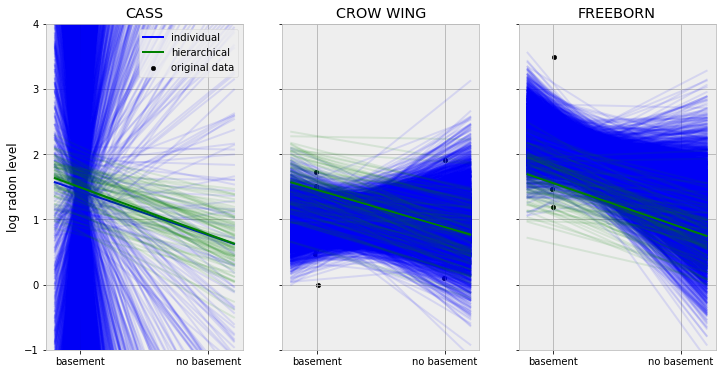

In [109]:
selection = ['CASS', 'CROW WING', 'FREEBORN']
fig, axis = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axis = axis.ravel()
for i, c in enumerate(selection):
    c_data = data[data.county == c]
    c_data = c_data.reset_index(drop=True)
    c_index = np.where(county_names == c)[0][0]
    z = list(c_data['county_code'])[0]

    xvals = np.linspace(-0.2, 1.2)
    for a_val, b_val in zip(unpooled_trace['a'][:, c_index], unpooled_trace['b'][:, c_index]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'b', alpha=.1)
    axis[i].plot(xvals, unpooled_trace['a'][:, c_index].mean() + unpooled_trace['b'][:, c_index].mean() * xvals,
                 'b', alpha=1, lw=2., label='individual')
    for a_val, b_val in zip(hierarchical_trace['a'][z], hierarchical_trace['b'][z]):
        axis[i].plot(xvals, a_val + b_val * xvals, 'g', alpha=.1)
    axis[i].plot(xvals, hierarchical_trace['a'][z].mean() + hierarchical_trace['b'][z].mean() * xvals,
                 'g', alpha=1, lw=2., label='hierarchical')
    axis[i].scatter(c_data.floor + np.random.randn(len(c_data))*0.01, c_data.log_radon,
                    alpha=1, color='k', marker='.', s=80, label='original data')
    axis[i].set_xticks([0, 1])
    axis[i].set_xticklabels(['basement', 'no basement'])
    axis[i].set_ylim(-1, 4)
    axis[i].set_title(c)
    if not i % 3:
        axis[i].legend()
        axis[i].set_ylabel('log radon level')

Âú®‰∏äÂõæ‰∏≠ÔºåÊàë‰ª¨Â∞Ü‰∏â‰∏™ÈÄâÂÆöÂéøÁöÑÊï∞ÊçÆÁÇπËÆæ‰∏∫ÈªëËâ≤„ÄÇÁ≤óÁ∫ø‰ª£Ë°®‰∏™‰ΩìÔºàËìùËâ≤ÔºâÂíåÂ±ÇÊ¨°Ê®°ÂûãÔºàÁªøËâ≤ÔºâÁöÑÂõûÂΩíÁ∫øÁöÑÂπ≥Âùá‰º∞ËÆ°„ÄÇËæÉÁªÜÁöÑÁ∫øÊòØÊù•Ëá™ÂêéÈ™åÁöÑÂçï‰∏™Ê†∑Êú¨ÁöÑÂõûÂΩíÁ∫øÔºå‰ΩøÊàë‰ª¨ÂØπ‰º∞ËÆ°ÂÄºÁöÑÂèØÂèòÊÄßÊúâÊâÄ‰∫ÜËß£„ÄÇ

ÂΩìÊü•ÁúãÂéøÁöÑ‚Äú CASS‚ÄùÊó∂ÔºåÊàë‰ª¨ÁúãÂà∞ÈùûÂ±ÇÊ¨°‰º∞ËÆ°ÊúâÂæàÂ§ßÁöÑÂÅèËßÅÔºöÂõ†‰∏∫ËØ•ÂéøÁöÑÊï∞ÊçÆ‰ªÖÂåÖÂê´ÊúâÂú∞‰∏ãÂÆ§ÁöÑÂÆ∂Â∫≠ÔºåÊâÄ‰ª•‰º∞ËÆ°ÁöÑÂõûÂΩí‰ºö‰∫ßÁîüË¥üË¥üÊñúÁéáÁöÑÊó†ÊÑè‰πâÁöÑÁªìÊûúÔºåËøôÊÑèÂë≥ÁùÄÊàë‰ª¨ÊúüÊúõË¥üÊï∞Ê≤°ÊúâÂú∞‰∏ãÂÆ§ÁöÑÊàøÂ±ã‰∏≠ÁöÑlevelsÊ∞¥Âπ≥ÔºÅ

Ê≠§Â§ñÔºåÂú®Á§∫‰æãÂéøÁöÑ‚Äú CROW WING‚ÄùÂíå‚Äú FREEBORN‚Äù‰∏≠ÔºåÈùûÂàÜÂ±ÇÊ®°Âûã‰ºº‰πéÊØîÂàÜÂ±ÇÊ®°ÂûãÂØπÊï∞ÊçÆÈõÜ‰∏≠ÂºÇÂ∏∏ÂÄºÁöÑÂèçÂ∫îÊõ¥Âº∫ÁÉàÔºà‚Äú CROW WING‚ÄùÔºöÊó†Âú∞‰∏ãÂÆ§Âè≥‰∏äËßí„ÄÇ‚Äú FREEBORN‚Äù ÔºöÂú∞‰∏ãÂÆ§Â∑¶‰∏äËßíÔºâ„ÄÇÂÅáËÆæÂú®Âú∞‰∏ãÂÆ§Áõ∏ÂØπ‰∫éÊ≤°ÊúâÂú∞‰∏ãÂÆ§ÁöÑÂÆ∂Â∫≠‰∏≠ÂèØ‰ª•ÊµãÈáèÂà∞Êõ¥Â§öÁöÑraÊ∞îÔºåÂéø‚Äú CROW WING‚ÄùÁöÑÈùûÂàÜÂ±ÇÊ®°Âºè‰ºº‰πéÂ∑≤ÁªèÊ∂àÂ§±„ÄÇÊúâ‰∫ÜÁæ§‰ΩìÂàÜÂ∏ÉÁ∫¶ÊùüÁ≥ªÊï∞ÔºåÊàë‰ª¨Âú®ÊâÄÊúâÊÉÖÂÜµ‰∏ãÈÉΩ‰ºöÂæóÂà∞ÊúâÊÑè‰πâÁöÑ‰º∞ËÆ°ÔºåÂõ†‰∏∫Êàë‰ª¨Â∞Ü‰ªéÁæ§‰Ωì‰∏≠Â≠¶Âà∞ÁöÑÁü•ËØÜÂ∫îÁî®‰∫é‰∏™‰∫∫ÔºåÂèç‰πã‰∫¶ÁÑ∂„ÄÇ

### Êî∂Áº©Áéá¬∂
Êî∂Áº©ÁéáÊèèËø∞‰∫ÜÁî±‰∫éÂÖ±ÂêåÁöÑÁæ§‰ΩìÂàÜÂ∏ÉËÄåÂ∞ÜÊàë‰ª¨ÁöÑ‰º∞ËÆ°‚ÄúÊãâ‚ÄùÂà∞Áæ§‰ΩìÂùáÂÄºÁöÑËøáÁ®ã‚ÄìÂú®Ê≠£ÊÄÅÊÄßÂÅáËÆæ‰∏ãÔºå‰∏éÁæ§‰ΩìÂùáÂÄºÁõ∏Â∑ÆÂæàËøúÁöÑÂéøÁ≥ªÊï∞ÂÖ∑ÊúâÈùûÂ∏∏‰ΩéÁöÑÊ¶ÇÁéáÔºå‰ªéËÄå‰ΩøÂÆÉ‰ª¨Êõ¥Êé•Ëøë‰∫éÂùáÂÄº„ÄÇ Â∞èÁªÑÂπ≥ÂùáÂÄºÁªô‰∫à‰ªñ‰ª¨Êõ¥È´òÁöÑÂèØËÉΩÊÄß„ÄÇ Âú®ÈùûÂàÜÂ±ÇÊ®°Âûã‰∏≠Ôºå‰ªÖÈÄöËøá‰ΩøÁî®ÊØè‰∏™ÂéøÁöÑÊï∞ÊçÆÔºåÊØè‰∏™ÂéøÂ∞±ÂèØ‰ª•‰∏éÂÖ∂‰ªñÂéøÂÆåÂÖ®‰∏çÂêåÔºå‰ªéËÄåÂØºËá¥Ê®°ÂûãÊõ¥ÂÆπÊòìÂá∫Áé∞ÂºÇÂ∏∏ÂÄºÔºàÂ¶Ç‰∏äÊâÄÁ§∫Ôºâ„ÄÇ

In [110]:
hier_a = hierarchical_trace['a'][500:].mean(axis=0)
hier_b = hierarchical_trace['b'][500:].mean(axis=0)
indv_a = [unpooled_trace['a'][500:, np.where(county_names==c)[0][0]].mean() for c in county_names]
indv_b = [unpooled_trace['b'][500:, np.where(county_names==c)[0][0]].mean() for c in county_names]

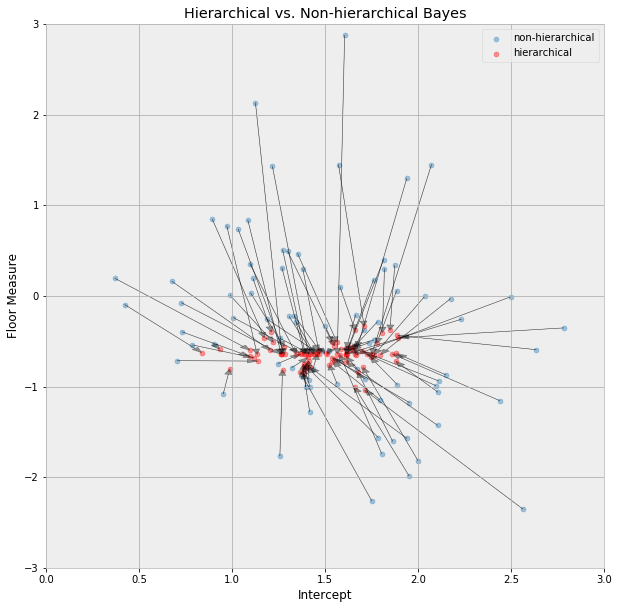

In [111]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, xlabel='Intercept', ylabel='Floor Measure',
                     title='Hierarchical vs. Non-hierarchical Bayes',
                     xlim=(0, 3), ylim=(-3, 3))

ax.scatter(indv_a, indv_b, s=26, alpha=0.4, label = 'non-hierarchical')
ax.scatter(hier_a,hier_b, c='red', s=26, alpha=0.4, label = 'hierarchical')
for i in range(len(indv_b)):
    ax.arrow(indv_a[i], indv_b[i], hier_a[i] - indv_a[i], hier_b[i] - indv_b[i],
             fc="k", ec="k", length_includes_head=True, alpha=0.4, head_width=.04)
ax.legend();

Âú®‰∏äÊñπÁöÑÊî∂Áº©Âõæ‰∏≠ÔºåÊàë‰ª¨ÊòæÁ§∫‰∫ÜÊØè‰∏™ÂéøÁöÑÈùûÂêéÈ™åÂùáÂÄºÔºàËìùËâ≤ÔºâÂíåÂêéÈ™åÂùáÂÄºÔºàÁ∫¢Ëâ≤ÔºâÁöÑÁ≥ªÊï∞„ÄÇ‰∏∫‰∫ÜÊòæÁ§∫Êî∂Áº©ÂØπÂçï‰∏™Á≥ªÊï∞ÂØπÔºàŒ±ÂíåŒ≤ÔºâÁöÑÂΩ±ÂìçÔºåÊàë‰ª¨Áî®ÁÆ≠Â§¥ËøûÊé•‰∫ÜÂ±û‰∫éÂêå‰∏ÄÂéøÁöÑËìùÁÇπÂíåÁ∫¢ÁÇπ„ÄÇ‰∏Ä‰∫õÈùûÂàÜÂ±ÇÁöÑÂêéÈ™åÂ§™Ëøú‰∫ÜÔºå‰ª•Ëá≥‰∫éÊàë‰ª¨Êó†Ê≥ïÂú®Ê≠§Âõæ‰∏≠ÊòæÁ§∫ÂÆÉ‰ª¨ÔºàËøô‰ºö‰ΩøËΩ¥Â§™ÂÆΩÔºâ„ÄÇÊúâË∂£ÁöÑÊòØÔºåÂπ≥Èù¢ÂõæÁöÑÊâÄÊúâÂàÜÂ±ÇÂêéÈ™å‰ºº‰πéÈÉΩÂú®-0.6Â∑¶Âè≥ÔºåËøôË°®ÊòéÂá†‰πéÊâÄÊúâÂéøÈÉΩËÆæÊúâÂú∞‰∏ãÂÆ§ÊòØÊèêÈ´òÊ∞°Âê´ÈáèÁöÑÊòéÊòæÊåáÊ†á„ÄÇÊà™Ë∑ùÔºàÊàë‰ª¨ÈíàÂØπÂúüÂ£§Á±ªÂûãÈááÂèñÁöÑÊà™Ë∑ùÔºâÂú®ÂêÑÂéø‰πãÈó¥‰ºº‰πéÊúâÊâÄ‰∏çÂêå„ÄÇÂ¶ÇÊûúÊàë‰ª¨‰ªÖ‰ΩøÁî®ÈùûÂàÜÂ±ÇÊ®°ÂûãÔºåÂàôÂæàÈöæÊâæÂà∞Ê≠§‰ø°ÊÅØ„ÄÇ

Ëá≥ÂÖ≥ÈáçË¶ÅÁöÑÊòØÔºåÂΩìÊàë‰ª¨ËÄÉËôëÁæ§‰ΩìÂàÜÂ∏ÉÊó∂ÔºåÂú®ÈùûÂàÜÂ±ÇÊ®°Âûã‰∏≠ÁúãËµ∑Êù•ÂæàÂ§ß‰∏îÂæàÈáçË¶ÅÁöÑËÆ∏Â§öÁªìÊûúÂÆûÈôÖ‰∏äË¶ÅÂ∞èÂæóÂ§öÔºàËøô‰∏ÄÁÇπ‰πüÂèØ‰ª•Âú®Chris'NB‰∏≠ÁöÑIn [12]‰∏≠ÁúãÂà∞Ôºâ „ÄÇÂõ†Ê≠§ÔºåÊî∂Áº©ÁéáÂèØ‰ª•Áúã‰ΩúÊòØ‰∏ÄÁßçÊô∫ËÉΩÊ≠£ÂàôÂåñÂΩ¢ÂºèÔºåÊúâÂä©‰∫éÂáèÂ∞ëÂÅáÈò≥ÊÄßÔºÅ

### ‰∏éÈ¢ëÁéáÁªüËÆ°ÁöÑËÅîÁ≥ª¬∂
ËøôÁßçÁ±ªÂûãÁöÑÂàÜÂ±ÇÁöÑÈÉ®ÂàÜÊ±†ÂåñÊ®°ÂûãÂú®ÁªüËÆ°Â≠¶ÊúØËØ≠‰∏≠Ë¢´Áß∞‰∏∫ÈöèÊú∫ÊïàÂ∫îÊ®°ÂûãÔºàÂú®ÁªüËÆ°‰∏≠ÔºåÈöèÊú∫ÊïàÂ∫îÊ®°ÂûãÔºà‰πüÁß∞‰∏∫ÊñπÂ∑ÆÊàêÂàÜÊ®°ÂûãÔºâÊòØ‰∏ÄÁßçÂàÜÂ±ÇÁ∫øÊÄßÊ®°Âûã„ÄÇ ÂÆÉÂÅáÂÆöË¶ÅÂàÜÊûêÁöÑÊï∞ÊçÆÊòØ‰ªé‰∏çÂêåÊÄª‰ΩìÁöÑÂ±ÇÊ¨°ÁªìÊûÑ‰∏≠ÊäΩÂèñÁöÑÔºåËøô‰∫õÂ±ÇÊ¨°ÁªìÊûÑÁöÑÂ∑ÆÂºÇ‰∏éËØ•Â±ÇÊ¨°ÁªìÊûÑÊúâÂÖ≥„ÄÇ Âú®ËÆ°ÈáèÁªèÊµéÂ≠¶‰∏≠ÔºåÂΩì‰∫∫‰ª¨‰∏çÂÅáÂÆöÂõ∫ÂÆöÊïàÂ∫îÔºàÂÖÅËÆ∏Âçï‰∏™ÊïàÂ∫îÔºâÊó∂ÔºåÂ∞ÜÈöèÊú∫ÊïàÂ∫îÊ®°ÂûãÁî®‰∫éÂ±ÇÊ¨°ÊàñÈù¢ÊùøÊï∞ÊçÆÁöÑÂàÜÊûê„ÄÇ ÈöèÊú∫ÊïàÂ∫îÊ®°ÂûãÊòØÂõ∫ÂÆöÊïàÂ∫îÊ®°ÂûãÁöÑÁâπ‰æã„ÄÇÔºâ„ÄÇ ÊúâË∂£ÁöÑÊòØÔºåÂ¶ÇÊûúÊàë‰ª¨Âú®‰∏äËø∞Ê®°ÂûãÁöÑÁªÑÂùáÂÄºÂíåÊñπÂ∑Æ‰∏äÈááÁî®Áªü‰∏ÄÁöÑÂÖàÈ™åÔºåÂàôÂæóÂá∫ÁöÑË¥ùÂè∂ÊñØÊ®°ÂûãÂ∞ÜÁ≠âÂêå‰∫éÈöèÊú∫ÊïàÂ∫îÊ®°Âûã„ÄÇ ÂèØËÉΩ‰ºöÊÉ≥Âà∞ÔºåÂÖ∑ÊúâÁªü‰∏ÄÊàñËæÉÂÆΩÁöÑÊ≠£Â∏∏Ë∂Ö‰ºòÂÖàÁ∫ßÁöÑÊ®°Âûã‰πãÈó¥ÁöÑÂ∑ÆÂºÇ‰∏çÂ∫î‰∫ßÁîüÂ∑®Â§ßÂΩ±Âìç„ÄÇ ‰ΩÜÊòØÔºåÁõñÂ∞îÊõºËØ¥ÔºåÈºìÂä±‰ΩøÁî®Âº±‰ø°ÊÅØÂÖàÈ™åÔºàÂ¶ÇÊàë‰ª¨‰∏äÈù¢ÊâÄÂÅöÁöÑÈÇ£Ê†∑ÔºâÔºåËÄå‰∏çÊòØ‰ΩøÁî®ÊâÅÂπ≥ÂÖàÈ™å„ÄÇ

### ÊëòË¶Å¬∂
Âú®Êú¨ÁØáÁî±Danne ElbersÂÖ±ÂêåÊí∞ÂÜôÁöÑÊñáÁ´†‰∏≠ÔºåÊàë‰ª¨Â±ïÁ§∫‰∫ÜÂΩìÊàë‰ª¨ÊúüÊúõÊúâÁõ∏‰ººÁöÑÂ§öÁªÑÊµãÈáèÂÄºÊó∂ÔºåÂ§öÂ±ÇÂàÜÂ±ÇË¥ùÂè∂ÊñØÊ®°ÂûãÂ¶Ç‰ΩïÂú®‰∏§‰∏™ÊñπÈù¢ÈÉΩÂÅöÂà∞ÊúÄÂ•Ω„ÄÇÂπºÁ®öÁöÑÊñπÊ≥ïË¶Å‰πàÂ∞ÜÊâÄÊúâÊï∞ÊçÆÊ±áÊÄªÂú®‰∏ÄËµ∑ÔºåË¶Å‰πàÂøΩÁï•ÂêÑ‰∏™Â∑ÆÂºÇÔºåÊàñËÄÖÂ∞ÜÊØè‰∏™ÈõÜÂêàËßÜ‰∏∫ÂÆåÂÖ®Áã¨Á´ãÁöÑÈõÜÂêàÔºå‰ªéËÄåÂØºËá¥Âô™Â£∞‰º∞ËÆ°ÔºåÂ¶Ç‰∏äÊâÄÁ§∫„ÄÇÈÄöËøáÂÅáËÆæÊØè‰∏™ÂçïÁã¨ÁöÑÊï∞ÊçÆÈõÜÔºàÂú®Êàë‰ª¨ÁöÑ‰æãÂ≠ê‰∏≠‰∏∫ÊØè‰∏™ÂéøÔºâÂùáÊ†πÊçÆÁªÑÂàÜÂ∏ÉËøõË°åÂàÜÂ∏ÉÔºàÊàë‰ª¨ÂêåÊó∂ËøõË°å‰º∞ÁÆóÔºâÔºåÊàë‰ª¨Â∞ÜÂèóÁõä‰∫éÁªüËÆ°ÂäüËÉΩÁöÑÂ¢ûÂº∫ÂíåÊî∂Áº©ÊïàÂ∫îÁöÑÊô∫ËÉΩÂåñ„ÄÇÁÑ∂ÂêéÔºåPyMC3‰∏≠ÁöÑÊ¶ÇÁéáÁºñÁ®ã‰ΩøËØ•Ê®°ÂûãÁöÑË¥ùÂè∂ÊñØ‰º∞ËÆ°ÂèòÂæóÂæÆ‰∏çË∂≥ÈÅì„ÄÇ

‰Ωú‰∏∫ÂêéÁª≠Êé™ÊñΩÔºåÊàë‰ª¨ËøòÂèØ‰ª•Â∞ÜÂÖ∂‰ªñÂ∑ûÁ∫≥ÂÖ•Ê®°Âûã„ÄÇ‰∏∫Ê≠§ÔºåÊàë‰ª¨ÂèØ‰ª•Âú®Â±ÇÊ¨°ÁªìÊûÑ‰∏≠Ê∑ªÂä†Âè¶‰∏Ä‰∏™Â±ÇÔºåÊØè‰∏™Â∑ûÈÉΩÂú®ÂõΩÂÆ∂/Âú∞Âå∫Á∫ßÂà´Ê±áÈõÜ„ÄÇÊúÄÂêéÔºåÊàëÂçöÂÆ¢ÁöÑËØªËÄÖ‰ºöÊ≥®ÊÑèÂà∞Êàë‰ª¨ËøôÈáåÊ≤°Êúâ‰ΩøÁî®glmÔºàÔºâÔºåÂõ†‰∏∫ÂÆÉÂú®ÂàÜÂ±ÇÊ®°Âûã‰∏≠Ëøò‰∏çËÉΩÂæàÂ•ΩÂú∞ÂèëÊå•‰ΩúÁî®„ÄÇ